In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v7.csv", delimiter=";")
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]
print(duration)
dataset.head()

3.6094


,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,360000,2427.0,162.0:93.0:71.0:72.0:79.0:73.0:71.0:71.0:73.0:...,"400,True,0.24269999999999994,0,12,10000,2427.0...",3.6094,0.006742,8,132,132,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,360000,3573.0,89.0:89.0:95.0:198.0:218.0:156.0:90.0:109.0:17...,"402,True,0.35729999999999995,1,12,10000,3573.0...",3.6094,0.009925,8,132,132,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,360000,2492.0,94.0:68.0:73.0:61.0:73.0:83.0:74.0:63.0:73.0:7...,"404,True,0.24919999999999998,2,12,10000,2492.0...",3.6094,0.006922,8,132,132,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,360000,2335.0,64.0:64.0:64.0:73.0:74.0:64.0:74.0:74.0:56.0:6...,"406,True,0.23349999999999999,3,12,10000,2335.0...",3.6094,0.006486,8,132,132,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,360000,2436.0,70.0:64.0:57.0:75.0:72.0:65.0:75.0:66.0:63.0:7...,"408,True,0.24359999999999996,4,12,10000,2436.0...",3.6094,0.006767,8,132,132,True,NaN


### All Switches

#### Devices

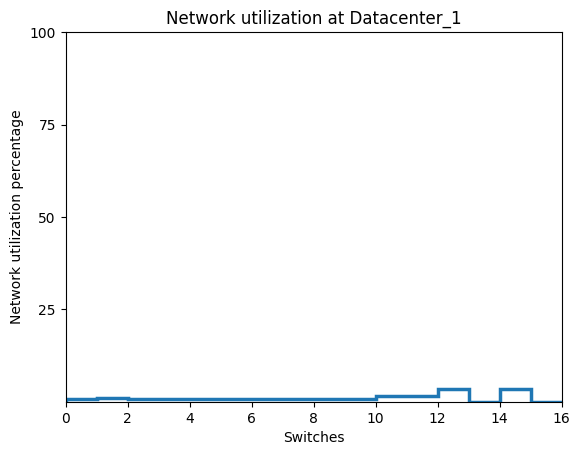

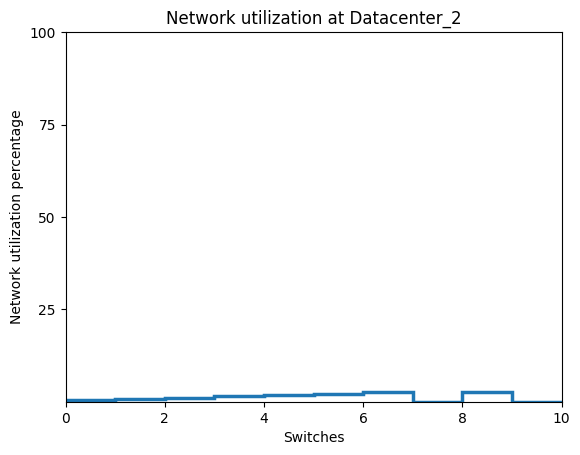

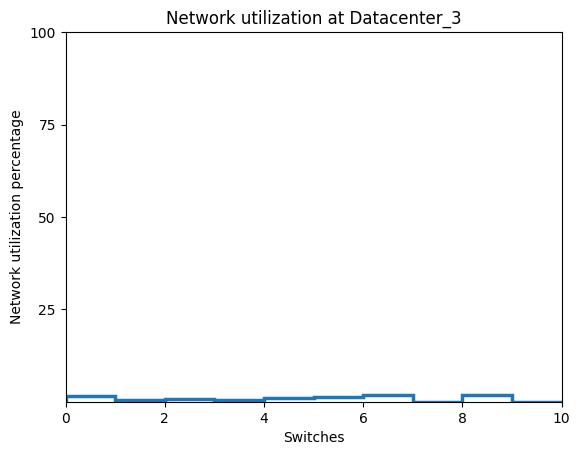

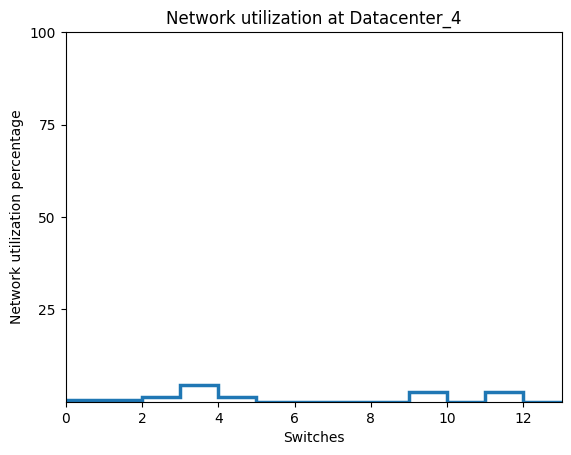

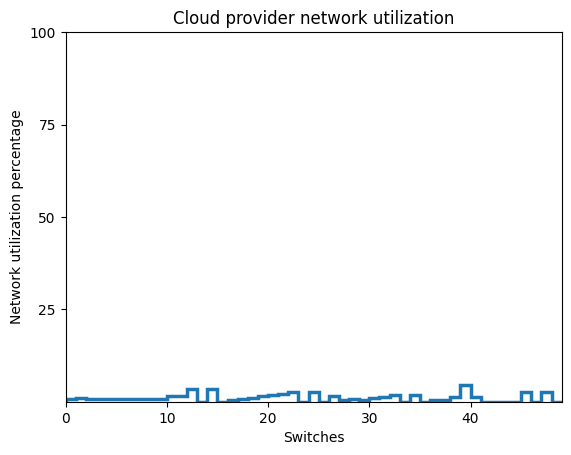

In [34]:
labels = np.unique(dataset['datacenter_name'])
# max_switch_bandwidth_utilization = max(dataset['band'])


cloud_provider_switches = np.array([])
cloud_provider_switches_powered_on = np.array([])
cloud_provider_switches_powered_off = np.array([])

cloud_provider_switches_max_power = np.array([])
cloud_provider_switches_current_power = np.array([])

cloud_provider_switches_max_bw = np.array([])
cloud_provider_switches_used_bw = np.array([])

for i in range(len(labels)):
    # max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")]['total_used_bandwidth'])
    switch_bandwidth_utilization = np.array([])
    
    datacenter_switches_max_bw = np.array([])
    datacenter_switches_used_bw = np.array([])
    
    switches = 0
    switches_on = 0
    switches_off = 0
    
    max_power = 0
    current_power = 0
    
    max_bw = 0
    used_bw = 0
    
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
        
        cloud_provider_switches_max_bw = np.append(cloud_provider_switches_max_bw, sample['bandwidth'])
        datacenter_switches_max_bw = np.append(datacenter_switches_max_bw, sample['bandwidth'])
        if sample['total_used_bandwidth'] > sample['bandwidth']:
            cloud_provider_switches_used_bw = np.append(cloud_provider_switches_used_bw, sample['bandwidth'])
            datacenter_switches_used_bw = np.append(datacenter_switches_used_bw, sample['bandwidth'])
        else:
            cloud_provider_switches_used_bw = np.append(cloud_provider_switches_used_bw, sample['total_used_bandwidth'])
            datacenter_switches_used_bw = np.append(datacenter_switches_used_bw, sample['total_used_bandwidth'])
        
        switches += 1
        max_power += sample['high_power']
        if sample['is_active']:
            switches_on += 1
            current_power += sample['high_power']
        else:
            switches_off += 1
        
        
        max_bw += sample['bandwidth']
        if sample['total_used_bandwidth'] > sample['bandwidth']:
            used_bw += sample['bandwidth']
        else:
            used_bw += sample['total_used_bandwidth']
    datacenter_access_switches = np.append(datacenter_access_switches, switches)
    datacenter_access_switches_powered_on = np.append(datacenter_access_switches_powered_on, switches_on)
    datacenter_access_switches_powered_off = np.append(datacenter_access_switches_powered_off, switches_off)
    datacenter_access_switches_current_power = np.append(datacenter_access_switches_current_power, current_power)
    
    datacenter_access_switches_max_bw = np.append(datacenter_access_switches_max_bw, max_bw)
    datacenter_access_switches_used_bw = np.append(datacenter_access_switches_used_bw, used_bw)
    
    # fig, ax = plt.subplots()
    # ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    # plt.ylabel("Resource utilization percentage")
    # plt.xlabel("Switches")
    # plt.title(f"Switches utilization at {sample['datacenter_name']}")
    # plt.legend()
    # plt.show()
    
    # fig, ax = plt.subplots()
    # ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    # ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    # plt.ylabel("Resource utilization percentage")
    # plt.xlabel("Switches")
    # plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    # plt.legend()
    # plt.show()
    
    # fig, ax = plt.subplots()
    # ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    # ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    # plt.ylabel("Bandwidth utilization")
    # plt.xlabel("Switches")
    # plt.title(f"Switches utilization at {sample['datacenter_name']}")
    # plt.legend()
    # plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(np.divide(datacenter_switches_used_bw, datacenter_switches_max_bw)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(datacenter_switches_max_bw)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Network utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Network utilization at {sample['datacenter_name']}")
    # plt.legend()
    plt.savefig(f"../figs/network/network_utilization/{sample['datacenter_name'].lower()}_network_utilization.eps", format="eps")
    plt.show()

fig, ax = plt.subplots()
ax.stairs(np.divide(cloud_provider_switches_used_bw, cloud_provider_switches_max_bw)*100, linewidth=2.5, label="Bandwidth")
ax.set(xlim=(0, len(cloud_provider_switches_used_bw)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
plt.ylabel("Network utilization percentage")
plt.xlabel("Switches")
plt.title(f"Cloud provider network utilization")
# plt.legend()
plt.savefig(f"../figs/network/network_utilization/cloud_provider_network_utilization.eps", format="eps")
plt.show()

#### Device ports

/tmp/ipykernel_161757/396057074.py:112: RuntimeWarning: invalid value encountered in divide
  ax.stairs(np.divide(datacenter_switch_ports_current_bw, datacenter_switch_ports_max_bw)*100, linewidth=2.5, label="Bandwidth")


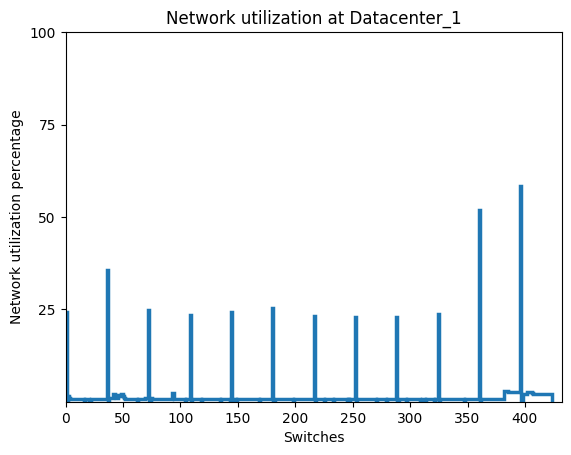

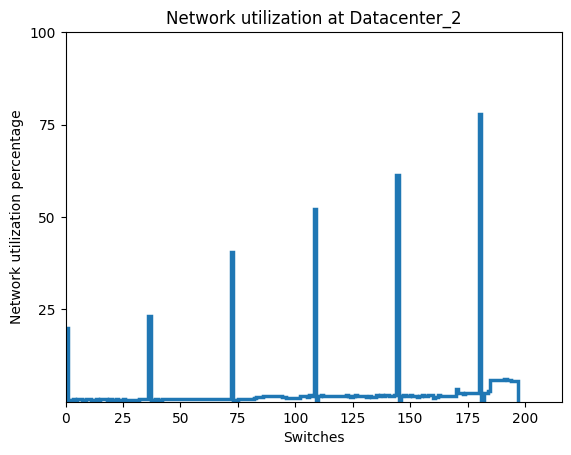

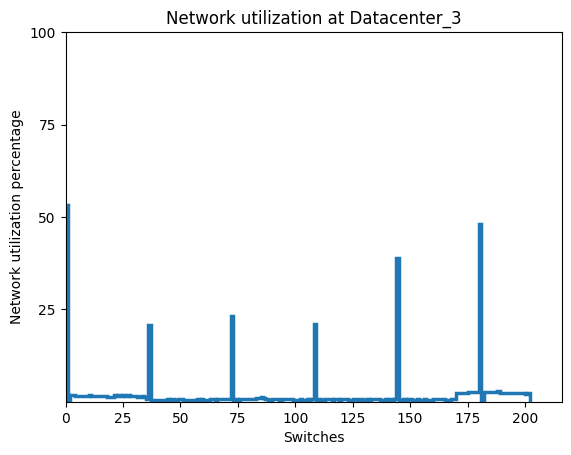

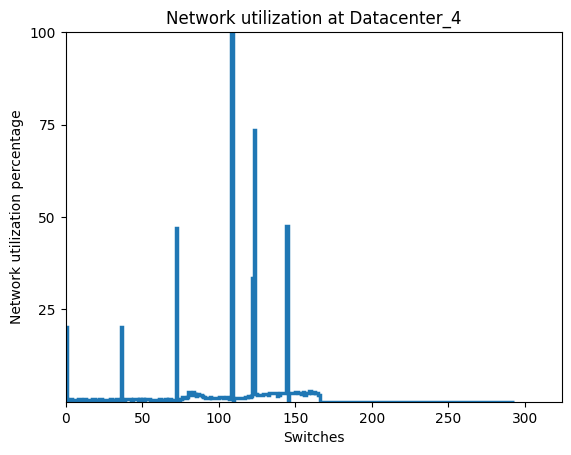

/tmp/ipykernel_161757/396057074.py:122: RuntimeWarning: invalid value encountered in divide
  ax.stairs(np.divide(cloud_provider_switch_ports_current_bw, cloud_provider_switch_ports_max_bw)*100, linewidth=2.5, label="Bandwidth")


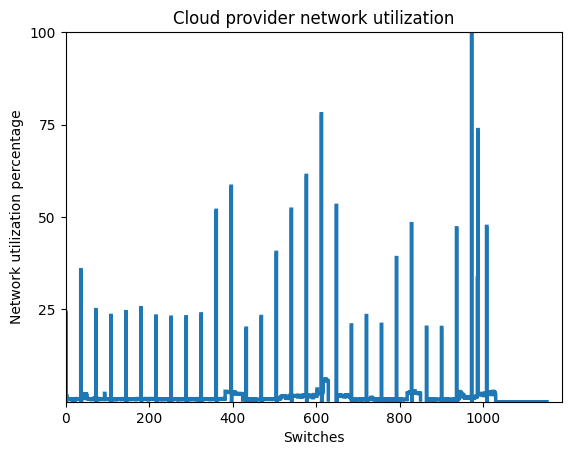

In [37]:
labels = np.unique(dataset['datacenter_name'])
# max_switch_port_bandwidth_utilization = 0
# for index, sample in dataset[dataset['role'] == "access switch"].iterrows():
#     if pd.notna(sample['ports']):
#         ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
#         for port in ports:
#             if port != "":
#                 port_info = port.split(",")
#                 if max_switch_port_bandwidth_utilization < float(port_info[6]):
#                     max_switch_port_bandwidth_utilization = float(port_info[6])


cloud_provider_switch_ports = np.array([])
cloud_provider_switch_ports_powered_on = np.array([])
cloud_provider_switch_ports_powered_off = np.array([])

cloud_provider_switch_ports_max_power = np.array([])
cloud_provider_switch_ports_current_power = np.array([])

cloud_provider_switches_max_combined_power = np.array([])
cloud_provider_switches_current_combined_power = np.array([])

cloud_provider_switch_ports_max_bw = np.array([])
cloud_provider_switch_ports_current_bw = np.array([])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switch_ports = 0
    switch_ports_on = 0
    switch_ports_off = 0
    
    max_port_power = 0
    current_port_power = 0
    
    max_combined_power = 0
    current_combined_power = 0
    
    datacenter_switch_ports_max_bw = np.array([])
    datacenter_switch_ports_current_bw = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        max_combined_power += sample['high_power']
        if sample['is_active'] == True:
            current_combined_power += sample['high_power']
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
                    
                    cloud_provider_switch_ports_max_bw = np.append(cloud_provider_switch_ports_max_bw, float(port_info[5]))
                    datacenter_switch_ports_max_bw = np.append(datacenter_switch_ports_max_bw, float(port_info[5]))
                    if float(port_info[6]) > float(port_info[5]):
                        cloud_provider_switch_ports_current_bw = np.append(cloud_provider_switch_ports_current_bw, float(port_info[5]))
                        datacenter_switch_ports_current_bw = np.append(datacenter_switch_ports_current_bw, float(port_info[5]))
                    else:
                        cloud_provider_switch_ports_current_bw = np.append(cloud_provider_switch_ports_current_bw, float(port_info[6]))
                        datacenter_switch_ports_current_bw = np.append(datacenter_switch_ports_current_bw, float(port_info[6]))
                    
                    switch_ports += 1
                    max_port_power += sample['power_per_port']
                    max_combined_power += sample['power_per_port']
                    if port_info[1].lower() == "true":
                        switch_ports_on += 1
                        current_combined_power += sample['power_per_port']
                    else:
                        switch_ports_off += 1
                # else:
                #     switch_ports_off += 1
                    
    # datacenter_access_switch_ports = np.append(datacenter_access_switch_ports, switch_ports)
    # datacenter_access_switch_ports_powered_on = np.append(datacenter_access_switch_ports_powered_on, switch_ports_on)
    # datacenter_access_switch_ports_powered_off = np.append(datacenter_access_switch_ports_powered_off, switch_ports_off)
    # datacenter_access_switch_ports_max_power = np.append(datacenter_access_switch_ports_max_power, max_port_power)
    # datacenter_access_switch_ports_current_power = np.append(datacenter_access_switch_ports_current_power, current_port_power)
    
    # datacenter_access_switches_max_combined_power = np.append(datacenter_access_switches_max_combined_power, max_combined_power)
    # datacenter_access_switches_current_combined_power = np.append(datacenter_access_switches_current_combined_power, current_combined_power)
    
    # fig, ax = plt.subplots()
    # ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    # ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    # plt.ylabel("Resource utilization percentage")
    # plt.xlabel("Switch port")
    # plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    # plt.legend()
    # plt.show()
    
    # fig, ax = plt.subplots()
    # ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    # ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    # plt.ylabel("Resource utilization percentage")
    # plt.xlabel("Switch port")
    # plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    # plt.legend()
    # plt.show()
    
    # fig, ax = plt.subplots()
    # ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    # ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    # plt.ylabel("Bandwidth utilization")
    # plt.xlabel("Switches")
    # plt.title(f"Switches utilization at {sample['datacenter_name']}")
    # plt.legend()
    # plt.show()
    fig, ax = plt.subplots()
    ax.stairs(np.divide(datacenter_switch_ports_current_bw, datacenter_switch_ports_max_bw)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(datacenter_switch_ports_max_bw)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Network utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Network utilization at {sample['datacenter_name']}")
    # plt.legend()
    plt.savefig(f"../figs/network/network_utilization/{sample['datacenter_name'].lower()}_network_port_utilization.eps", format="eps")
    plt.show()

fig, ax = plt.subplots()
ax.stairs(np.divide(cloud_provider_switch_ports_current_bw, cloud_provider_switch_ports_max_bw)*100, linewidth=2.5, label="Bandwidth")
ax.set(xlim=(0, len(cloud_provider_switch_ports_max_bw)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
plt.ylabel("Network utilization percentage")
plt.xlabel("Switches")
plt.title(f"Cloud provider network utilization")
# plt.legend()
plt.savefig(f"../figs/network/network_utilization/cloud_provider_network_port_utilization.eps", format="eps")
plt.show()

### Seperate Switches

#### Access switches

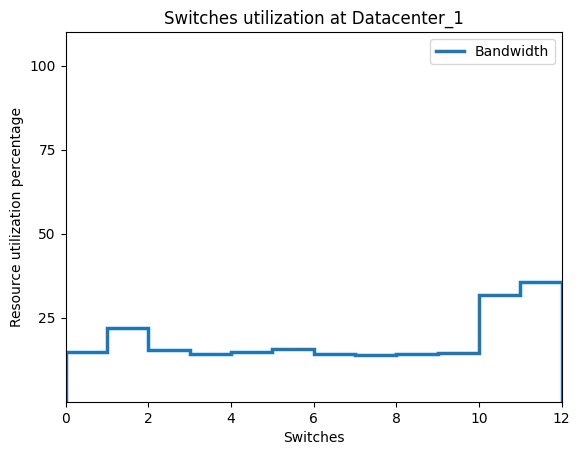

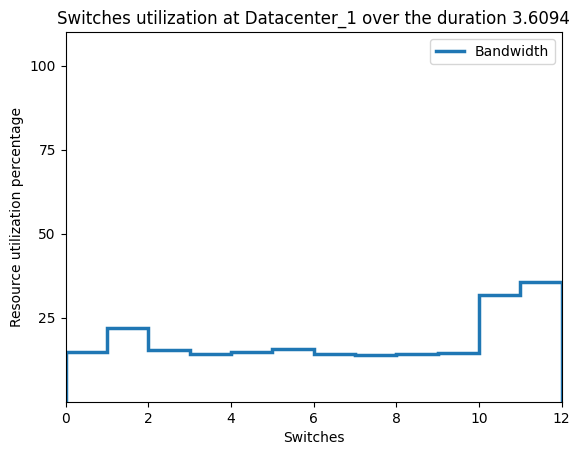

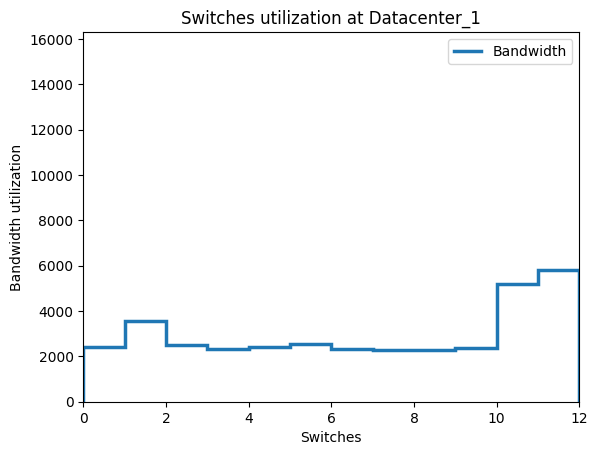

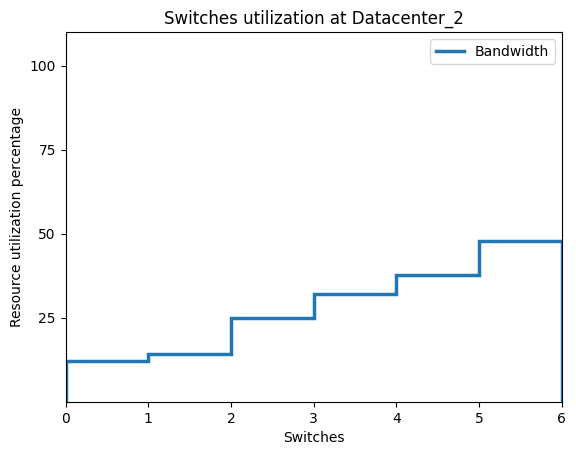

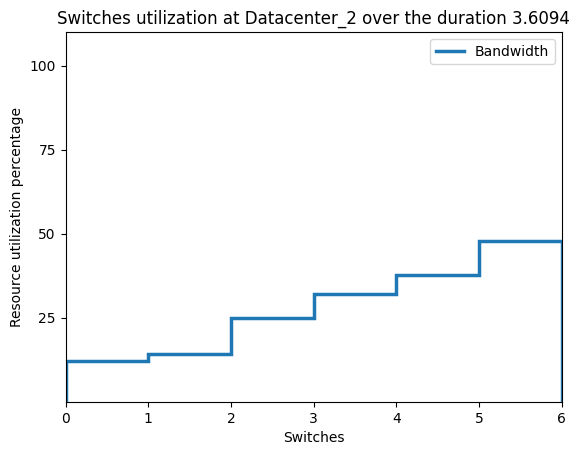

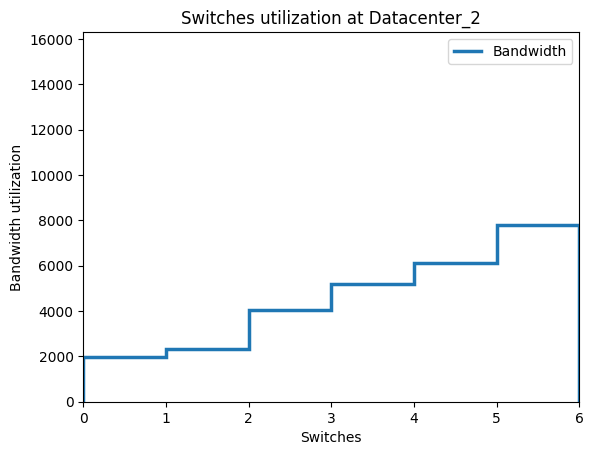

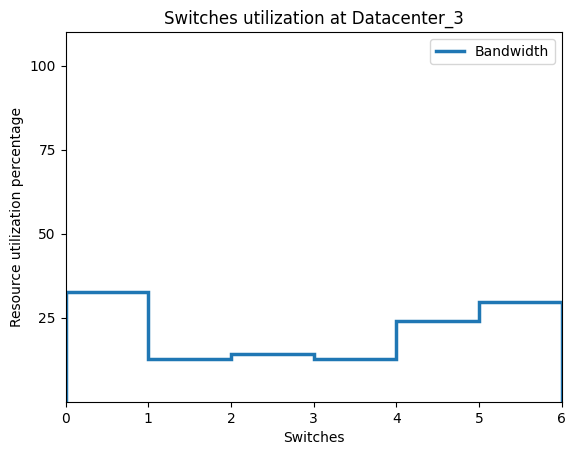

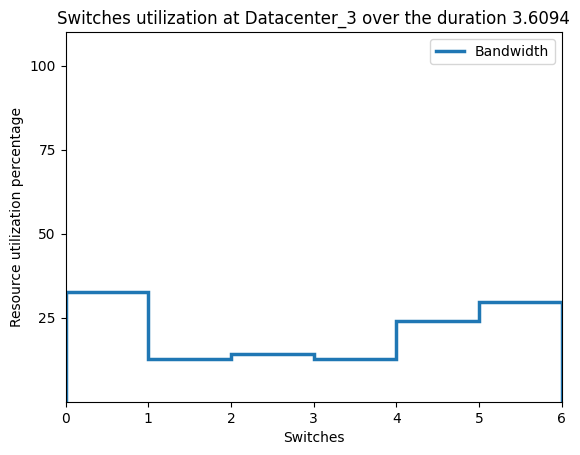

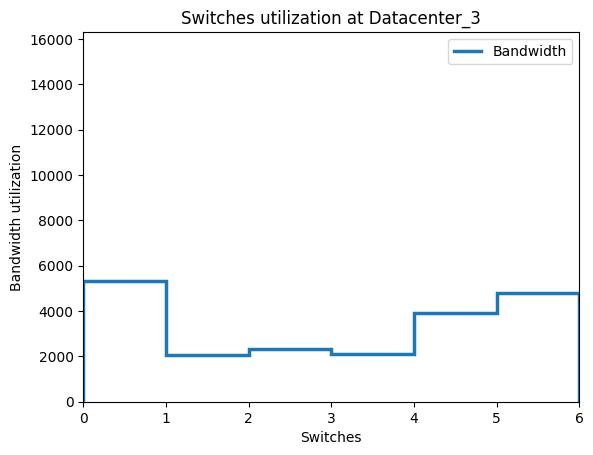

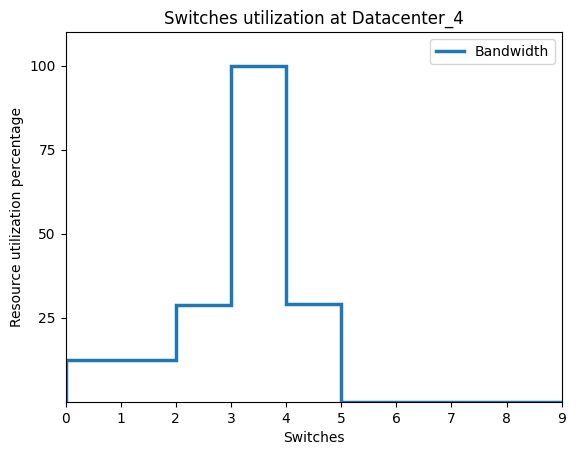

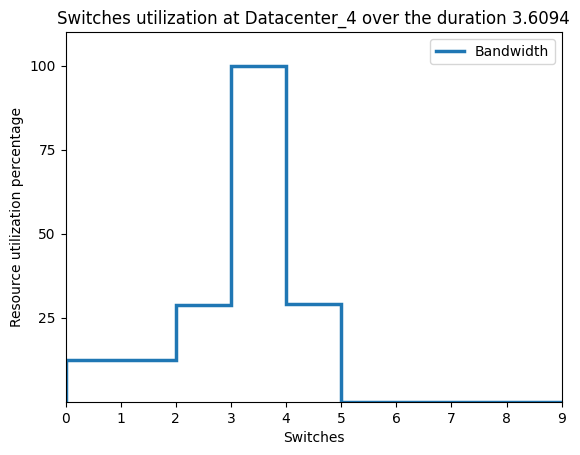

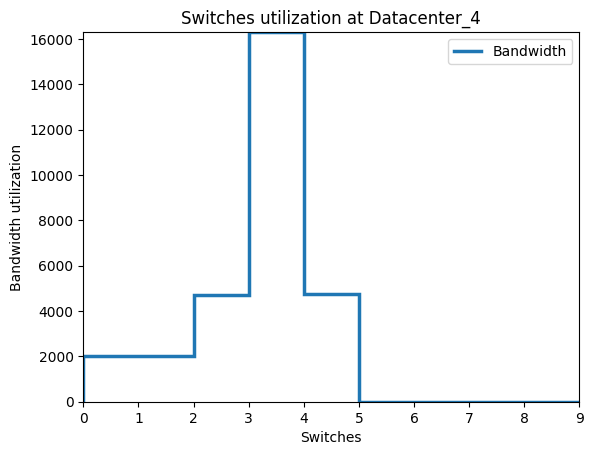

In [21]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[dataset['role'] == "access switch"]['total_used_bandwidth'])


datacenter_access_switches = np.array([])
datacenter_access_switches_powered_on = np.array([])
datacenter_access_switches_powered_off = np.array([])

datacenter_access_switches_max_power = np.array([])
datacenter_access_switches_current_power = np.array([])

datacenter_access_switches_max_bw = np.array([])
datacenter_access_switches_used_bw = np.array([])

for i in range(len(labels)):
    # max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")]['total_used_bandwidth'])
    switch_bandwidth_utilization = np.array([])
    
    switches = 0
    switches_on = 0
    switches_off = 0
    
    max_power = 0
    current_power = 0
    
    max_bw = 0
    used_bw = 0
    
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
        
        
        
        switches += 1
        max_power += sample['high_power']
        if sample['is_active']:
            switches_on += 1
            current_power += sample['high_power']
        else:
            switches_off += 1
        
        
        max_bw += sample['bandwidth']
        if sample['total_used_bandwidth'] > sample['bandwidth']:
            used_bw += sample['bandwidth']
        else:
            used_bw += sample['total_used_bandwidth']
    datacenter_access_switches = np.append(datacenter_access_switches, switches)
    datacenter_access_switches_powered_on = np.append(datacenter_access_switches_powered_on, switches_on)
    datacenter_access_switches_powered_off = np.append(datacenter_access_switches_powered_off, switches_off)
    datacenter_access_switches_max_power = np.append(datacenter_access_switches_max_power, max_power)
    datacenter_access_switches_current_power = np.append(datacenter_access_switches_current_power, current_power)
    
    datacenter_access_switches_max_bw = np.append(datacenter_access_switches_max_bw, max_bw)
    datacenter_access_switches_used_bw = np.append(datacenter_access_switches_used_bw, used_bw)
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

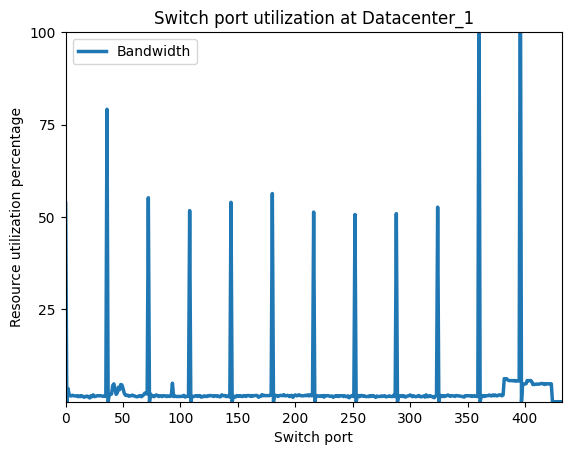

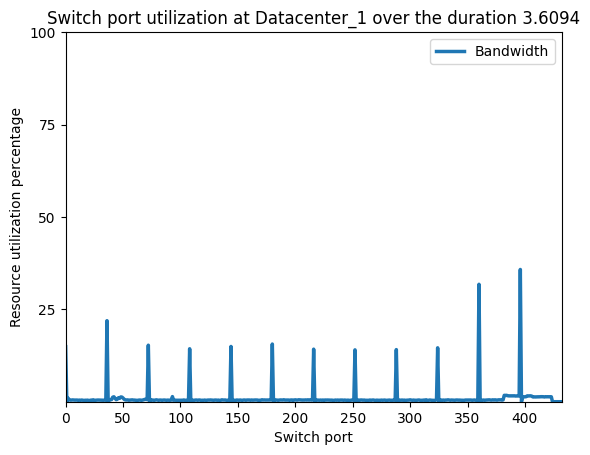

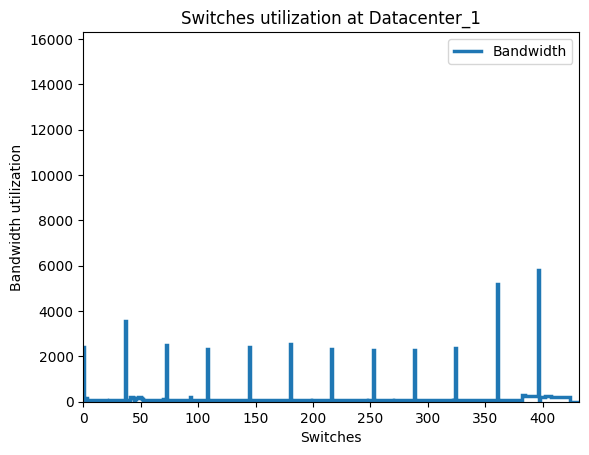

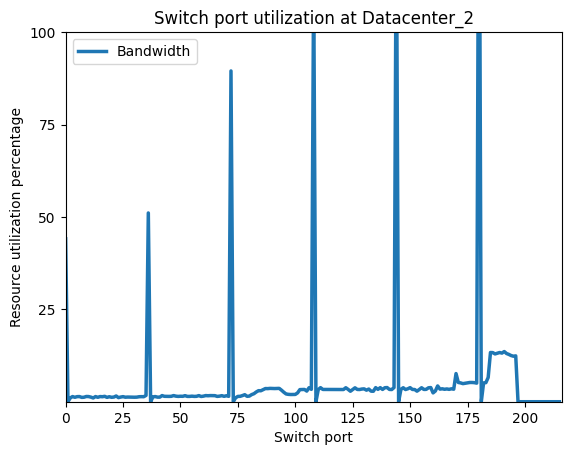

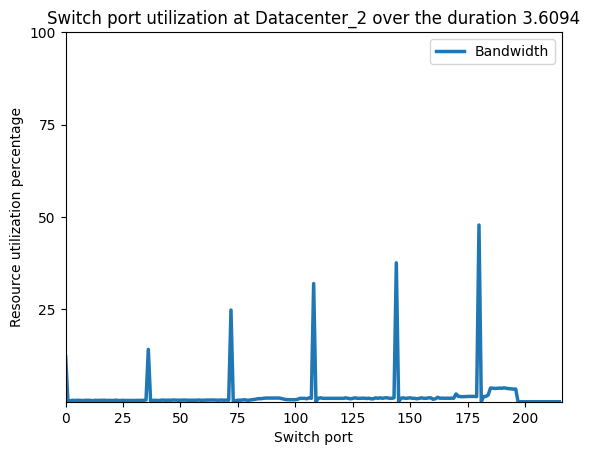

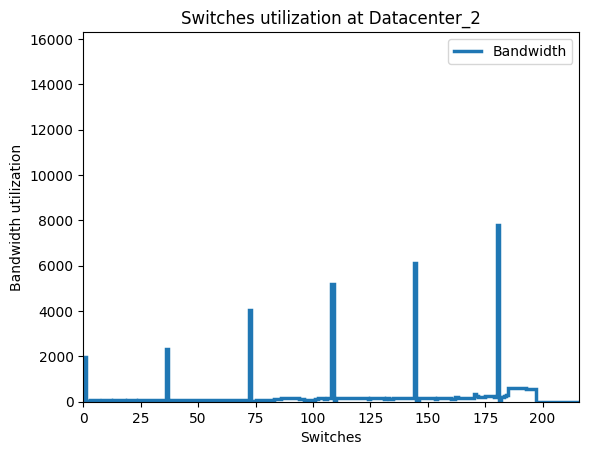

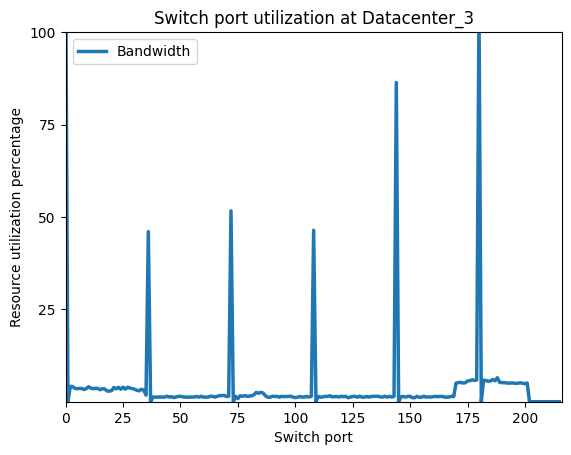

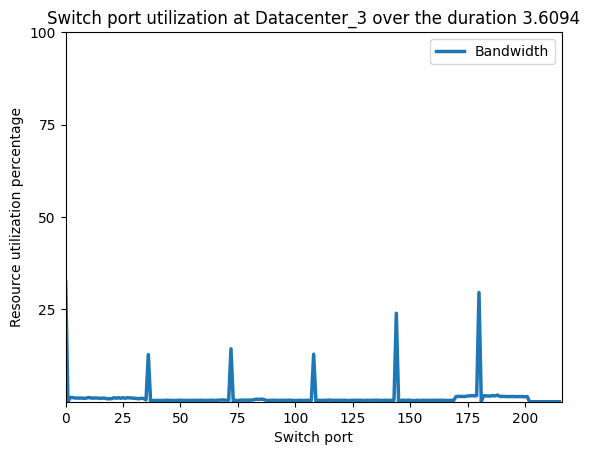

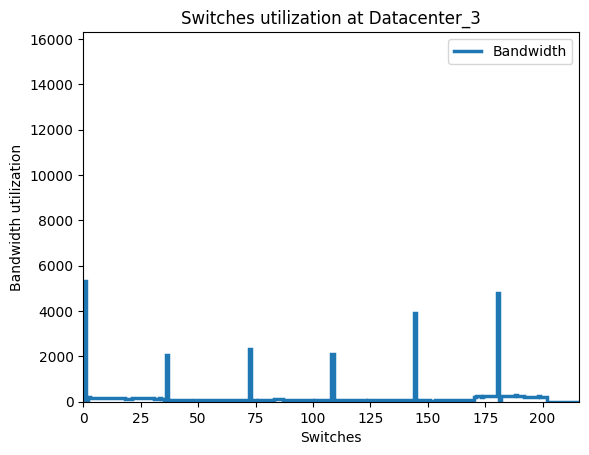

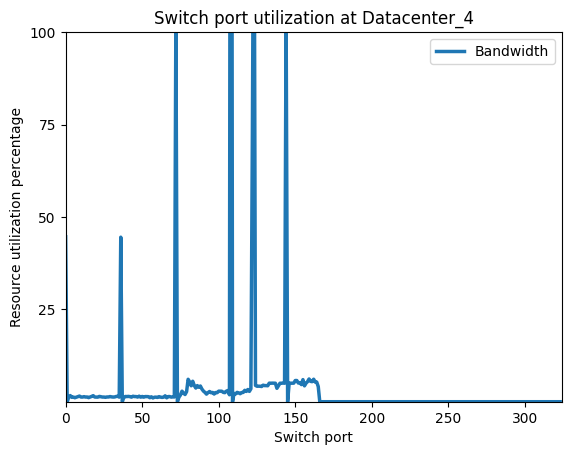

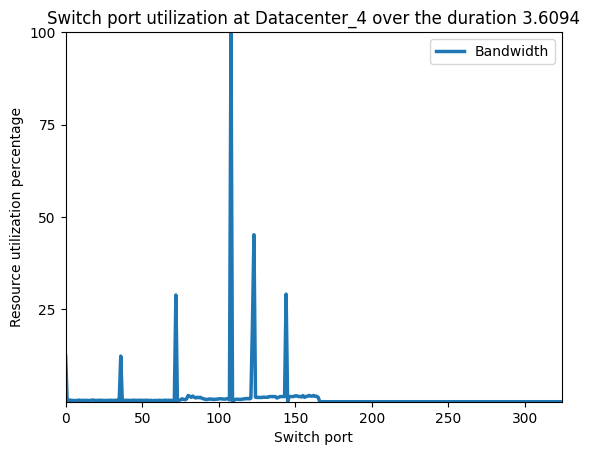

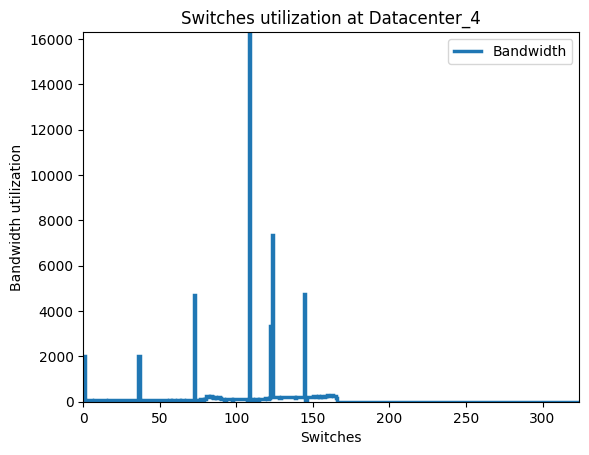

In [22]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "access switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])


datacenter_access_switch_ports = np.array([])
datacenter_access_switch_ports_powered_on = np.array([])
datacenter_access_switch_ports_powered_off = np.array([])

datacenter_access_switch_ports_max_power = np.array([])
datacenter_access_switch_ports_current_power = np.array([])

datacenter_access_switches_max_combined_power = np.array([])
datacenter_access_switches_current_combined_power = np.array([])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switch_ports = 0
    switch_ports_on = 0
    switch_ports_off = 0
    
    max_port_power = 0
    current_port_power = 0
    
    max_combined_power = 0
    current_combined_power = 0
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        max_combined_power += sample['high_power']
        if sample['is_active'] == True:
            current_combined_power += sample['high_power']
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
                    
                    switch_ports += 1
                    max_port_power += sample['power_per_port']
                    max_combined_power += sample['power_per_port']
                    if port_info[1].lower() == "true":
                        switch_ports_on += 1
                        current_combined_power += sample['power_per_port']
                    else:
                        switch_ports_off += 1
                # else:
                #     switch_ports_off += 1
                    
    datacenter_access_switch_ports = np.append(datacenter_access_switch_ports, switch_ports)
    datacenter_access_switch_ports_powered_on = np.append(datacenter_access_switch_ports_powered_on, switch_ports_on)
    datacenter_access_switch_ports_powered_off = np.append(datacenter_access_switch_ports_powered_off, switch_ports_off)
    datacenter_access_switch_ports_max_power = np.append(datacenter_access_switch_ports_max_power, max_port_power)
    datacenter_access_switch_ports_current_power = np.append(datacenter_access_switch_ports_current_power, current_port_power)
    
    datacenter_access_switches_max_combined_power = np.append(datacenter_access_switches_max_combined_power, max_combined_power)
    datacenter_access_switches_current_combined_power = np.append(datacenter_access_switches_current_combined_power, current_combined_power)
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

#### Distribution switches

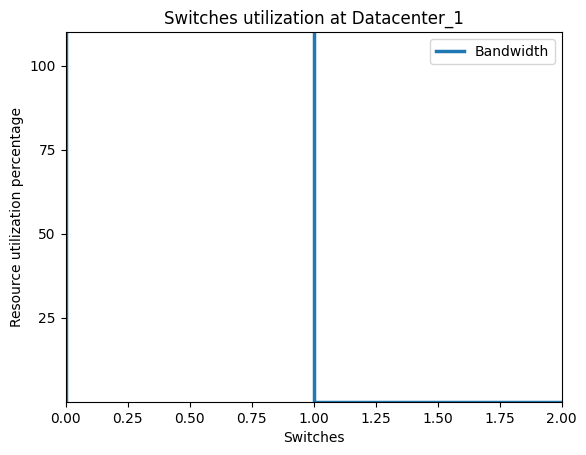

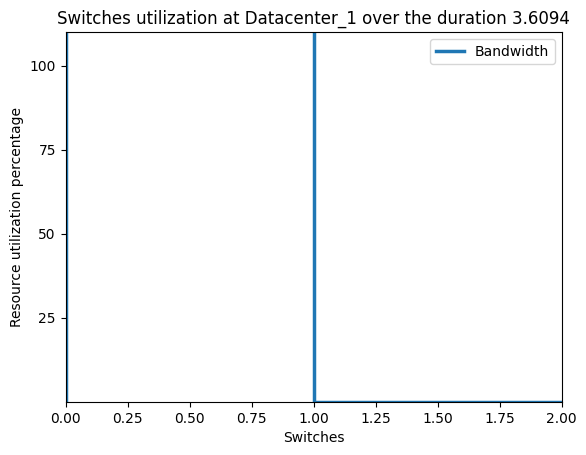

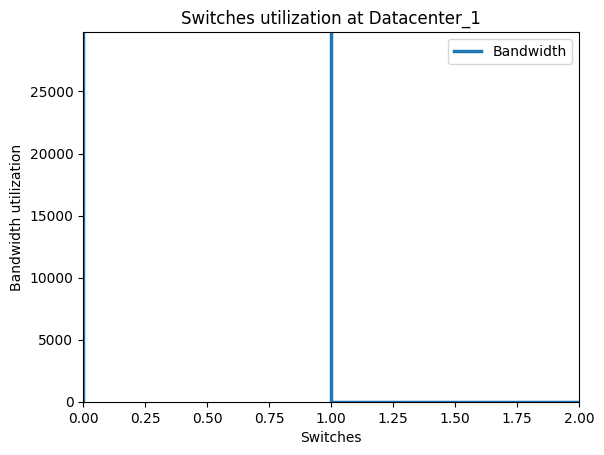

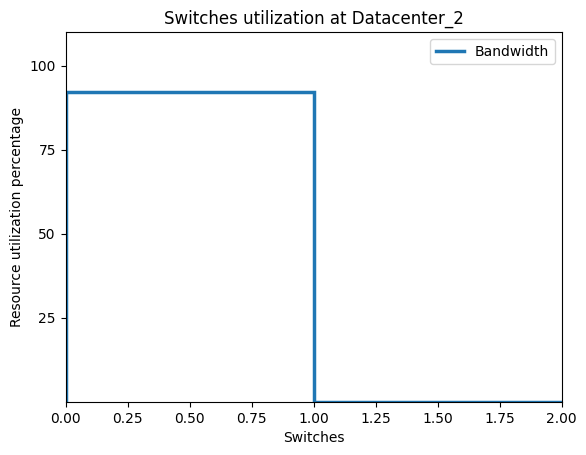

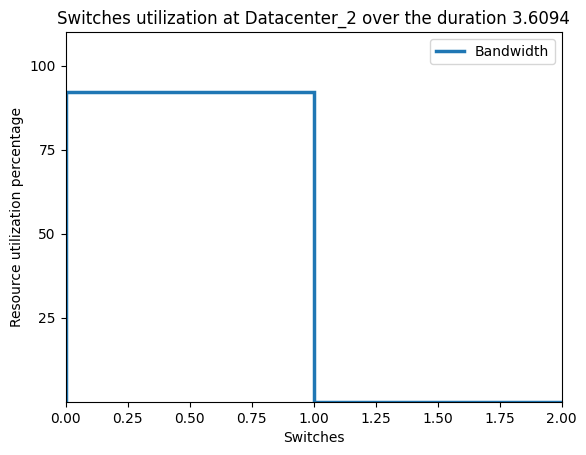

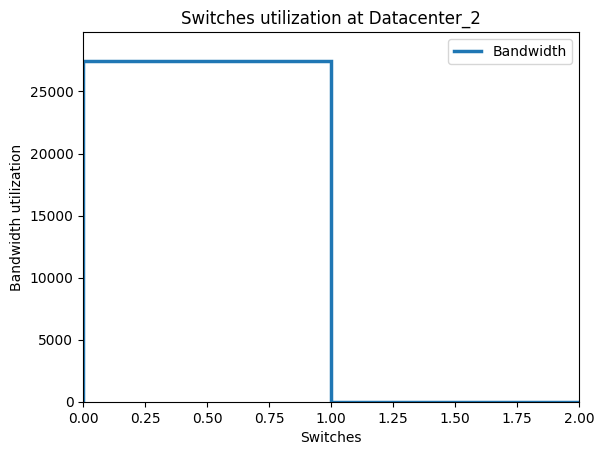

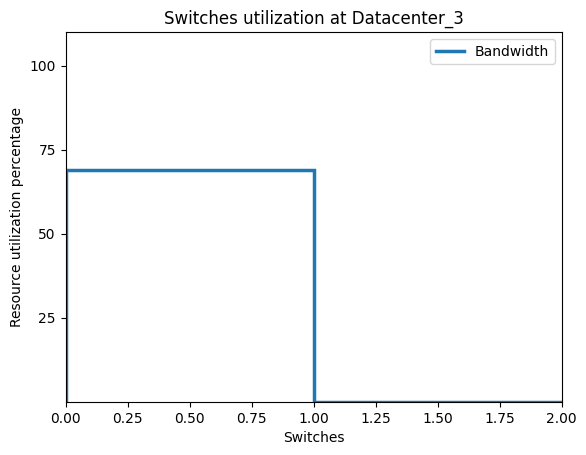

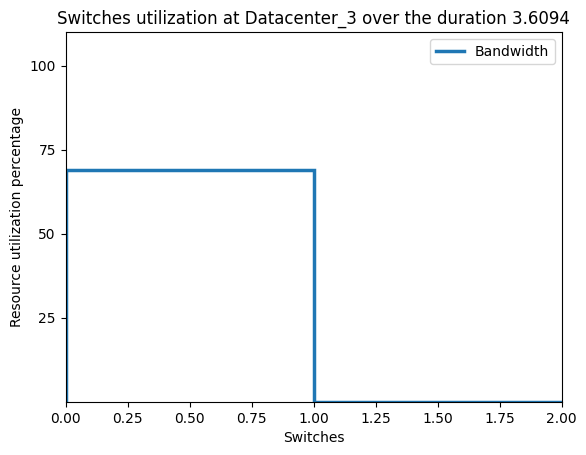

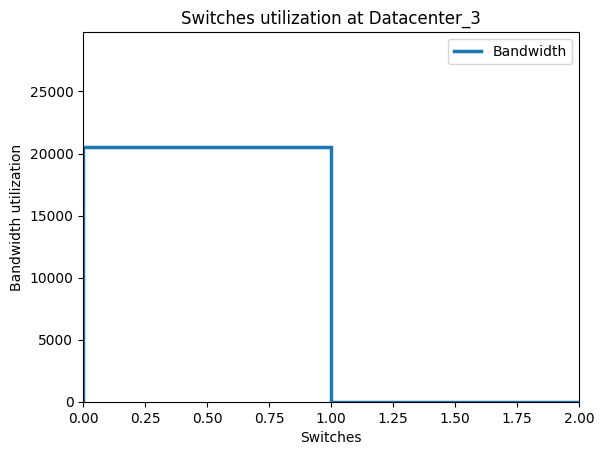

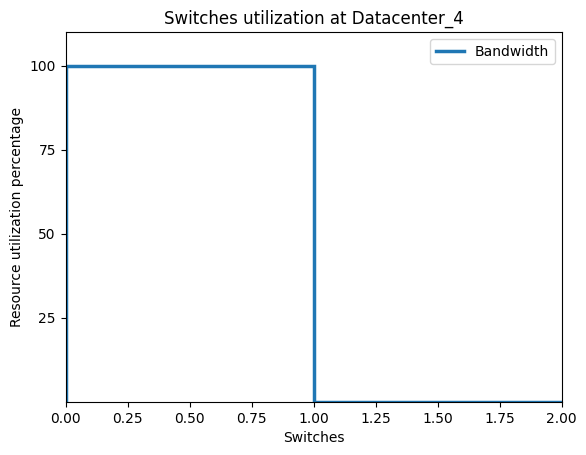

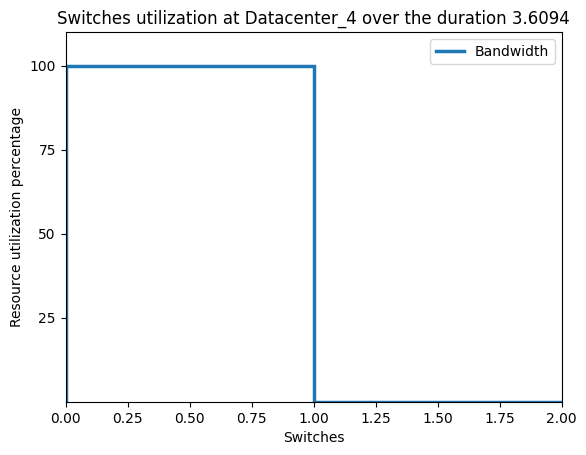

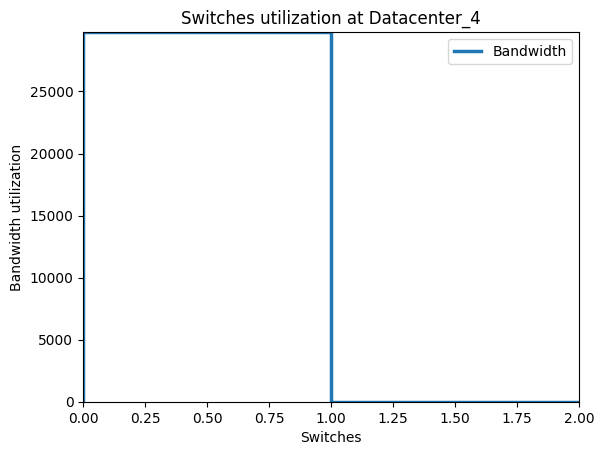

In [23]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")]['total_used_bandwidth'])

datacenter_distribution_switches = np.array([])
datacenter_distribution_switches_powered_on = np.array([])
datacenter_distribution_switches_powered_off = np.array([])

datacenter_distribution_switches_max_power = np.array([])
datacenter_distribution_switches_current_power = np.array([])

datacenter_distribution_switches_max_bw = np.array([])
datacenter_distribution_switches_used_bw = np.array([])

for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switches = 0
    switches_on = 0
    switches_off = 0
    
    max_power = 0
    current_power = 0
    
    max_bw = 0
    used_bw = 0
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
        
        switches += 1
        max_power += sample['high_power']
        if sample['is_active']:
            switches_on += 1
            current_power += sample['high_power']
        else:
            switches_off += 1
        
        
        max_bw += sample['bandwidth']
        if sample['total_used_bandwidth'] > sample['bandwidth']:
            used_bw += sample['bandwidth']
        else:
            used_bw += sample['total_used_bandwidth']
    datacenter_distribution_switches = np.append(datacenter_distribution_switches, switches)
    datacenter_distribution_switches_powered_on = np.append(datacenter_distribution_switches_powered_on, switches_on)
    datacenter_distribution_switches_powered_off = np.append(datacenter_distribution_switches_powered_off, switches_off)
    datacenter_distribution_switches_max_power = np.append(datacenter_distribution_switches_max_power, max_power)
    datacenter_distribution_switches_current_power = np.append(datacenter_distribution_switches_current_power, current_power)
    
    datacenter_distribution_switches_max_bw = np.append(datacenter_distribution_switches_max_bw, max_bw)
    datacenter_distribution_switches_used_bw = np.append(datacenter_distribution_switches_used_bw, used_bw)
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

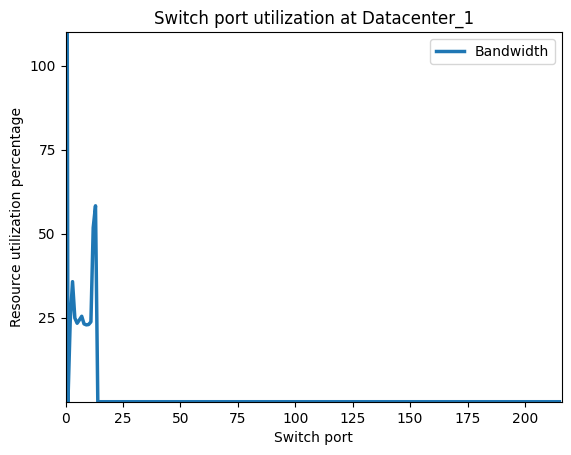

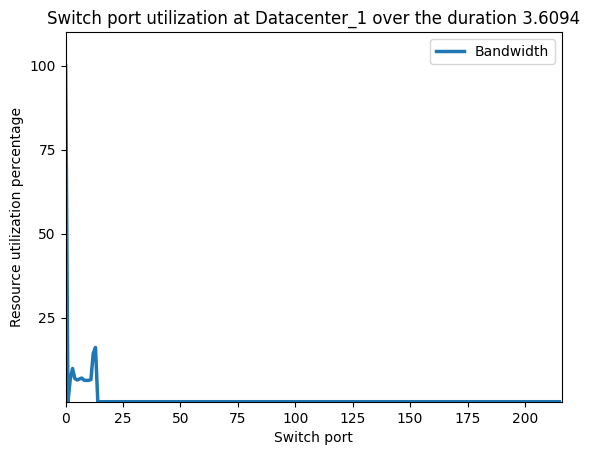

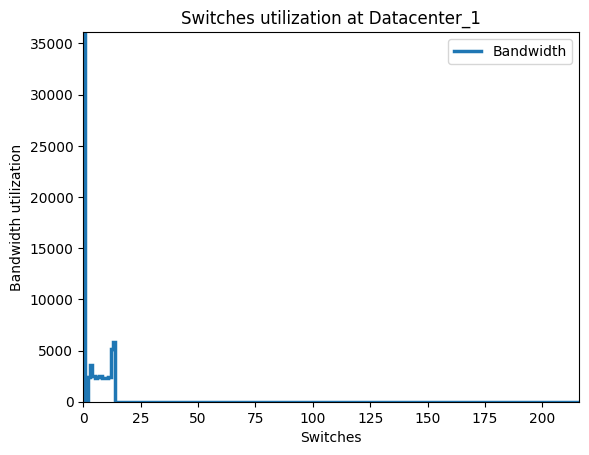

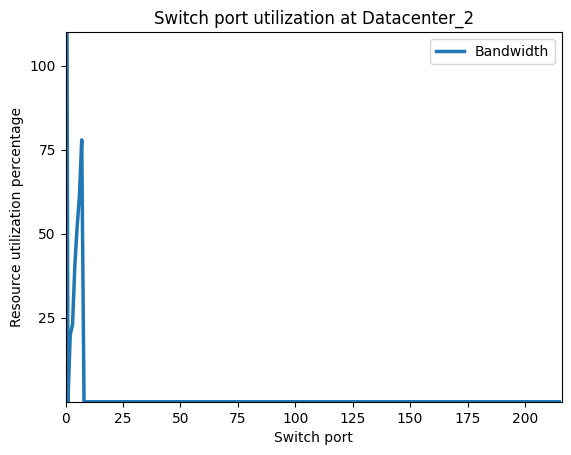

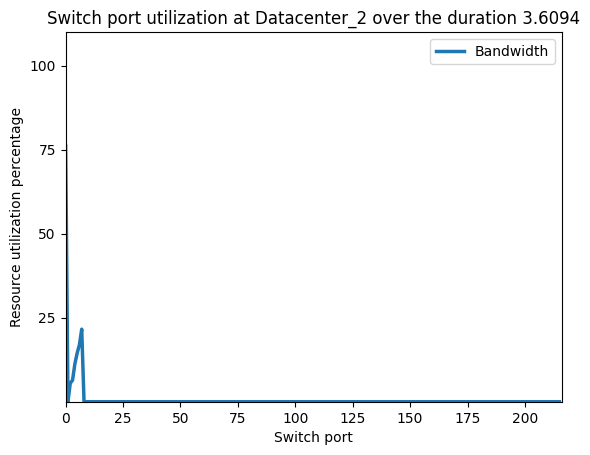

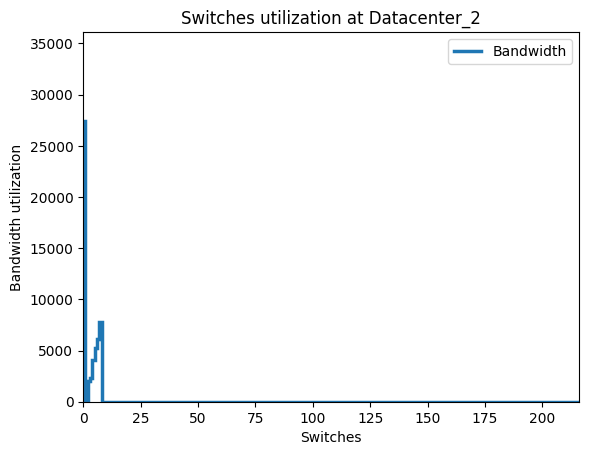

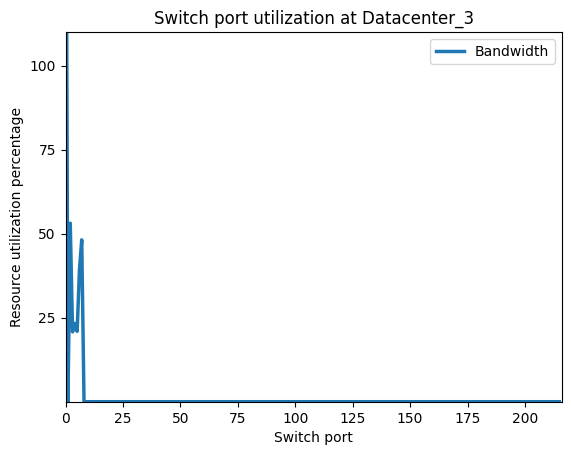

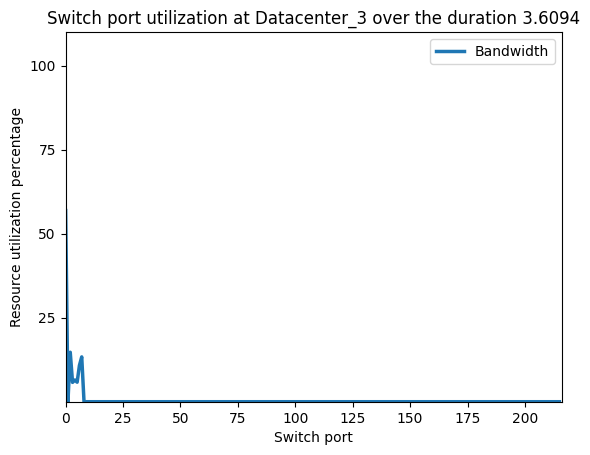

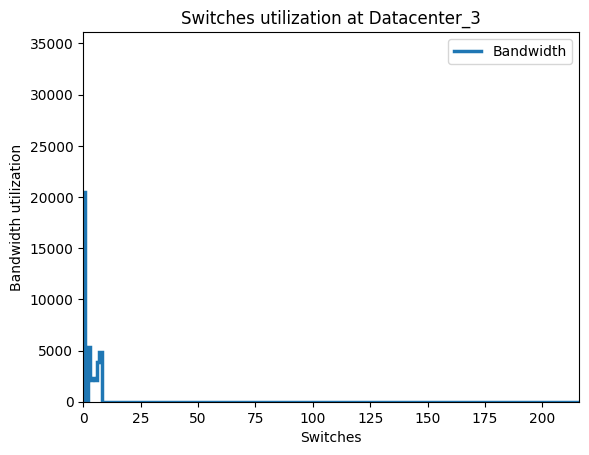

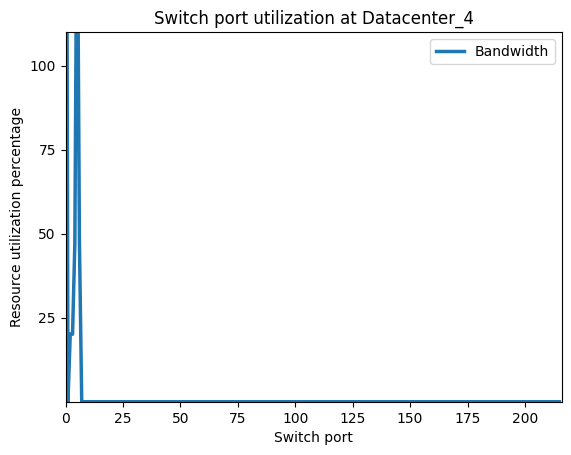

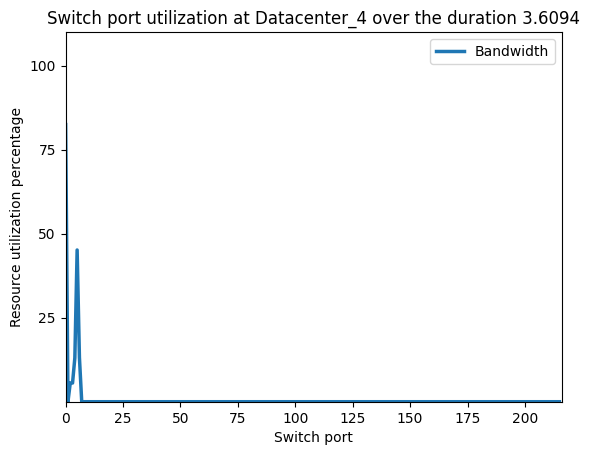

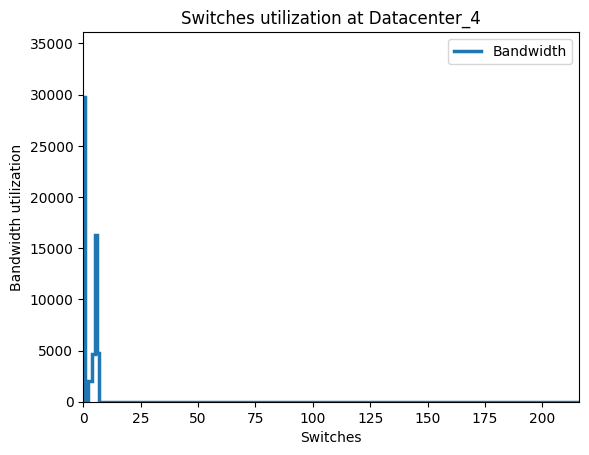

In [24]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "distribution switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

datacenter_distribution_switch_ports = np.array([])
datacenter_distribution_switch_ports_powered_on = np.array([])
datacenter_distribution_switch_ports_powered_off = np.array([])

datacenter_distribution_switch_ports_max_power = np.array([])
datacenter_distribution_switch_ports_current_power = np.array([])

datacenter_distribution_switches_max_combined_power = np.array([])
datacenter_distribution_switches_current_combined_power = np.array([])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switch_ports = 0
    switch_ports_on = 0
    switch_ports_off = 0
    
    max_port_power = 0
    current_port_power = 0
    
    max_combined_power = 0
    current_combined_power = 0
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        max_combined_power += sample['high_power']
        if sample['is_active'] == True:
            current_combined_power += sample['high_power']
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
                    
                    switch_ports += 1
                    max_port_power += sample['power_per_port']
                    max_combined_power += sample['power_per_port']
                    if port_info[1].lower() == "true":
                        switch_ports_on += 1
                        current_combined_power += sample['power_per_port']
                    else:
                        switch_ports_off += 1
                # else:
                #     switch_ports_off += 1
    
    datacenter_distribution_switch_ports = np.append(datacenter_distribution_switch_ports, switch_ports)
    datacenter_distribution_switch_ports_powered_on = np.append(datacenter_distribution_switch_ports_powered_on, switch_ports_on)
    datacenter_distribution_switch_ports_powered_off = np.append(datacenter_distribution_switch_ports_powered_off, switch_ports_off)
    datacenter_distribution_switch_ports_max_power = np.append(datacenter_distribution_switch_ports_max_power, max_port_power)
    datacenter_distribution_switch_ports_current_power = np.append(datacenter_distribution_switch_ports_current_power, current_port_power)
    
    datacenter_distribution_switches_max_combined_power = np.append(datacenter_distribution_switches_max_combined_power, max_combined_power)
    datacenter_distribution_switches_current_combined_power = np.append(datacenter_distribution_switches_current_combined_power, current_combined_power)
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

#### Core switches

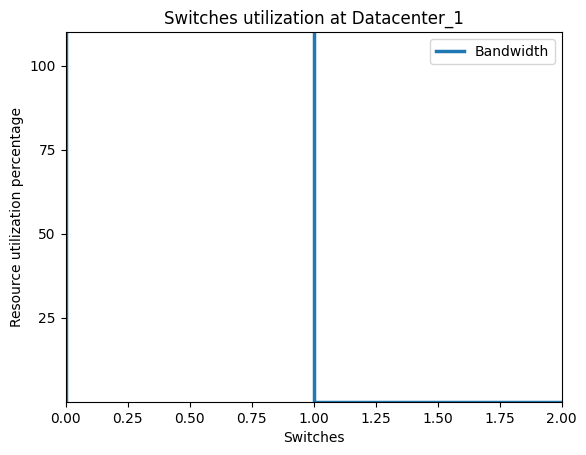

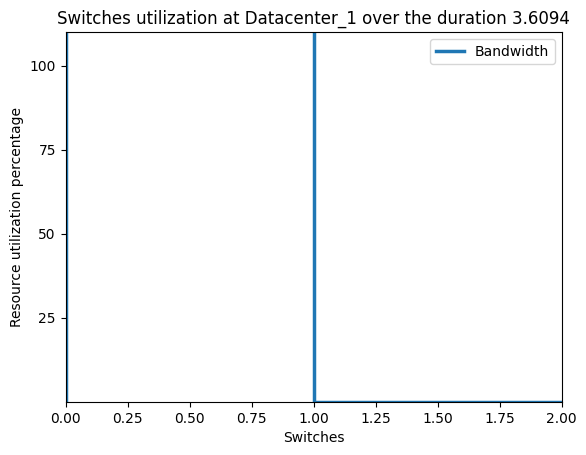

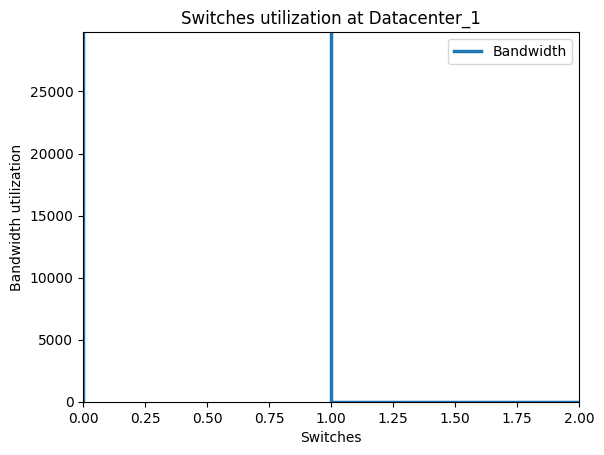

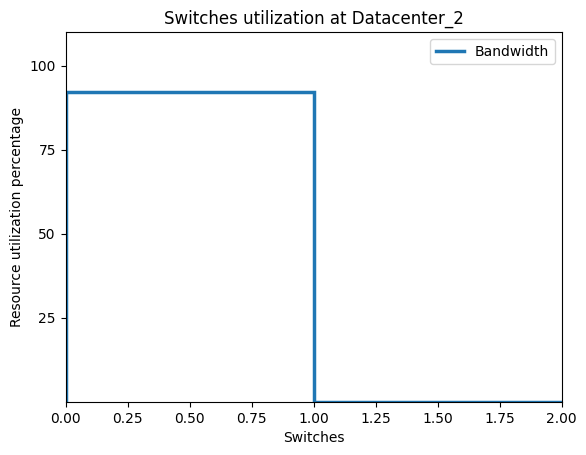

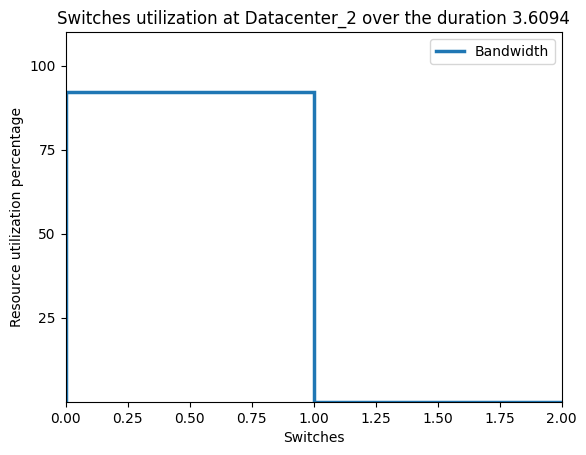

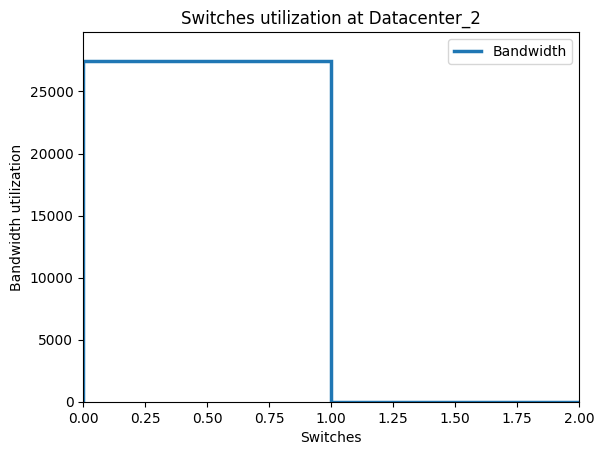

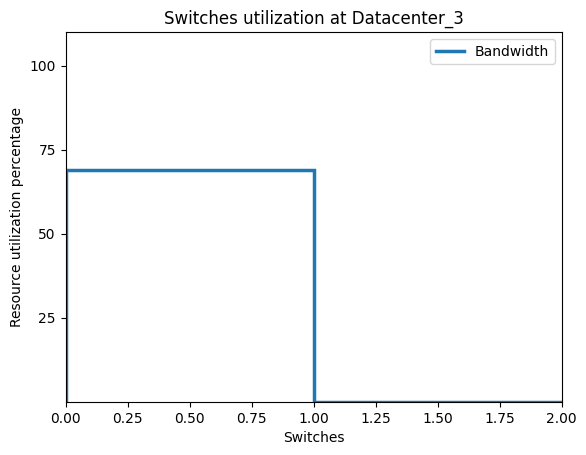

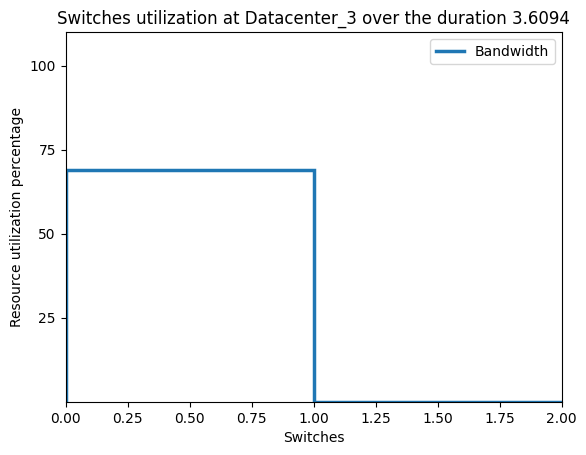

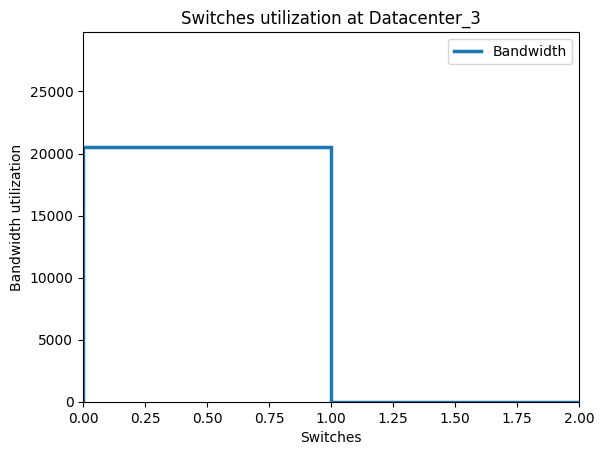

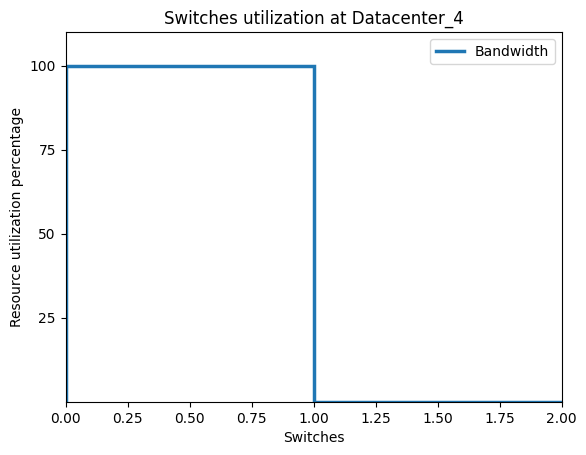

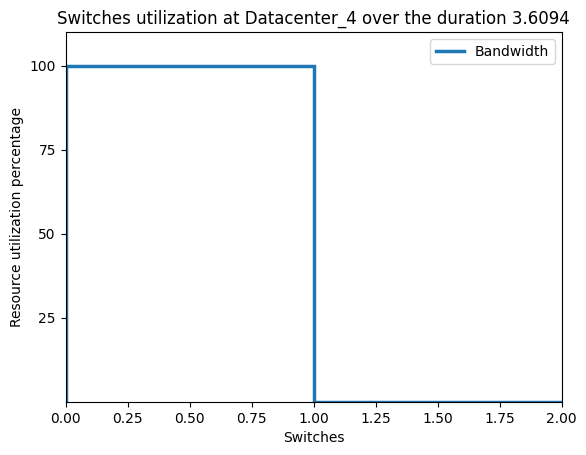

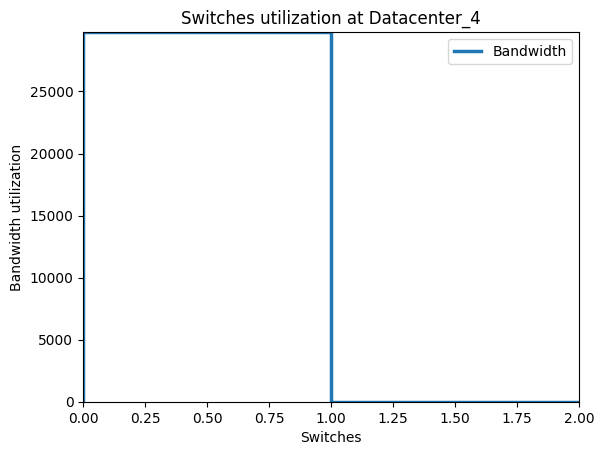

In [25]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")]['total_used_bandwidth'])

datacenter_core_switches = np.array([])
datacenter_core_switches_powered_on = np.array([])
datacenter_core_switches_powered_off = np.array([])

datacenter_core_switches_max_power = np.array([])
datacenter_core_switches_current_power = np.array([])

datacenter_core_switches_max_bw = np.array([])
datacenter_core_switches_used_bw = np.array([])

for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switches = 0
    switches_on = 0
    switches_off = 0
    
    max_power = 0
    current_power = 0
    
    max_bw = 0
    used_bw = 0
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
        
        switches += 1
        max_power += sample['high_power']
        if sample['is_active']:
            switches_on += 1
            current_power += sample['high_power']
        else:
            switches_off += 1
        
        
        max_bw += sample['bandwidth']
        if sample['total_used_bandwidth'] > sample['bandwidth']:
            used_bw += sample['bandwidth']
        else:
            used_bw += sample['total_used_bandwidth']
    datacenter_core_switches = np.append(datacenter_core_switches, switches)
    datacenter_core_switches_powered_on = np.append(datacenter_core_switches_powered_on, switches_on)
    datacenter_core_switches_powered_off = np.append(datacenter_core_switches_powered_off, switches_off)
    datacenter_core_switches_max_power = np.append(datacenter_core_switches_max_power, max_power)
    datacenter_core_switches_current_power = np.append(datacenter_core_switches_current_power, current_power)
    
    datacenter_core_switches_max_bw = np.append(datacenter_core_switches_max_bw, max_bw)
    datacenter_core_switches_used_bw = np.append(datacenter_core_switches_used_bw, used_bw)
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

>> 1056
>> 1056
<< 2144 >>


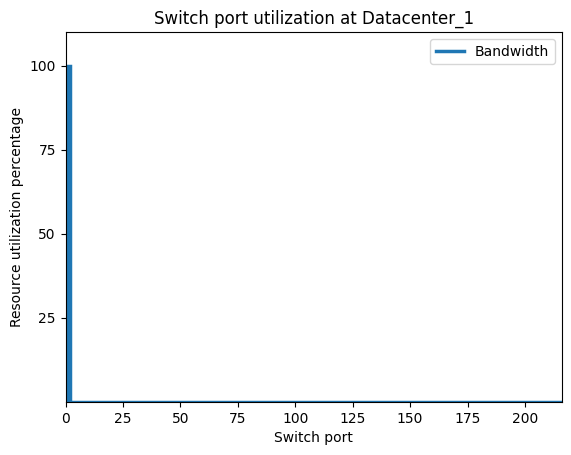

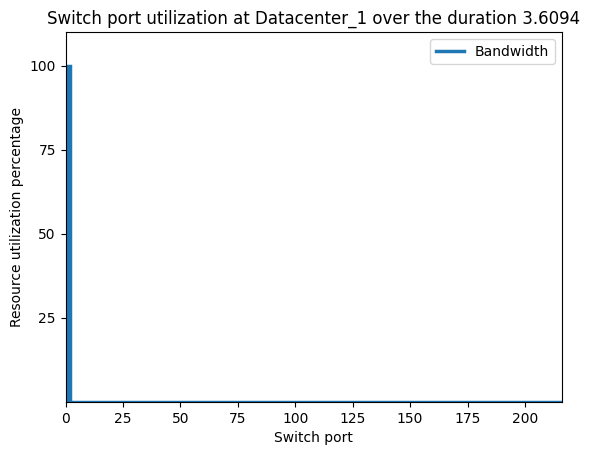

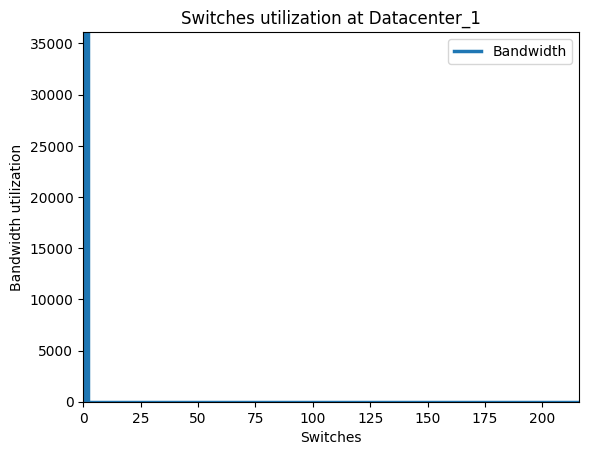

>> 1056
>> 1056
<< 2144 >>


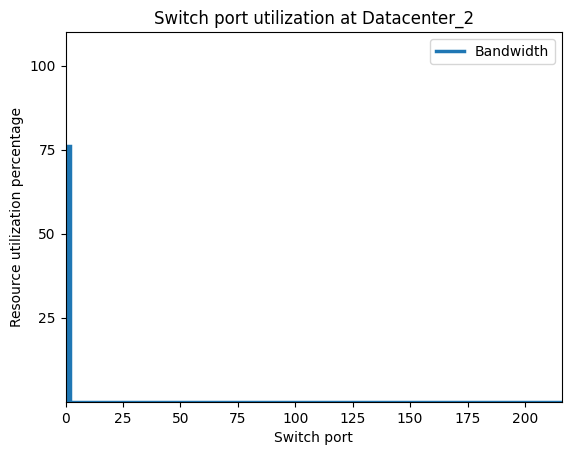

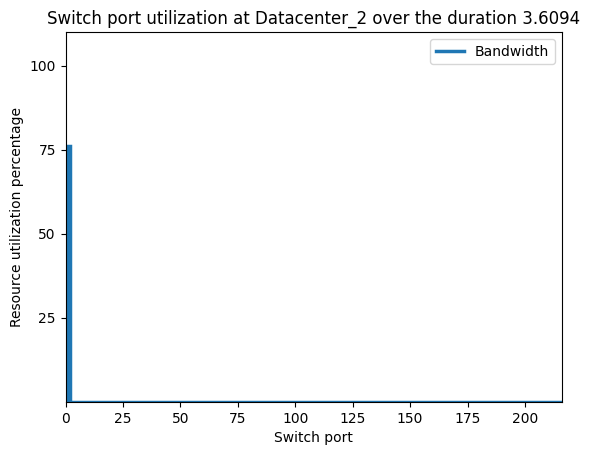

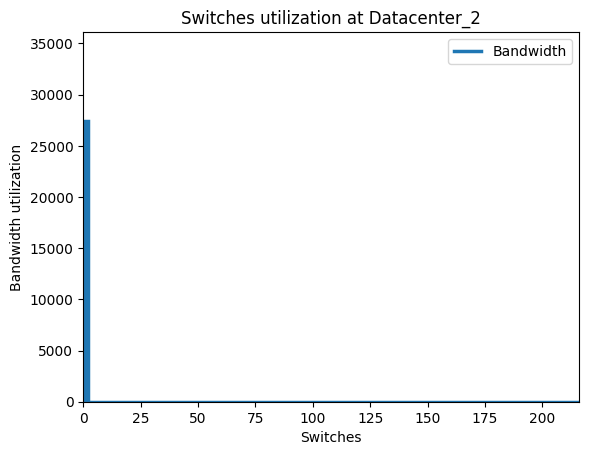

>> 1056
>> 1056
<< 2144 >>


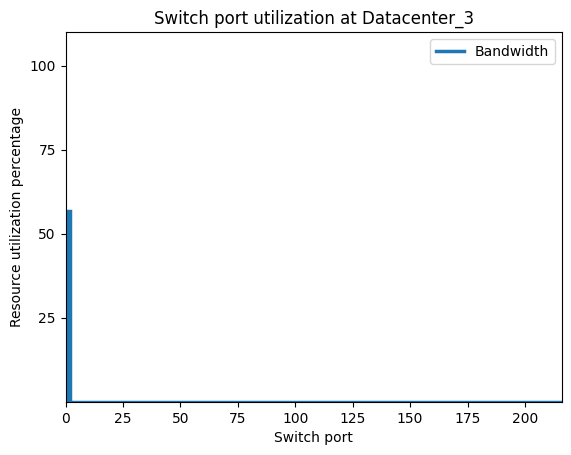

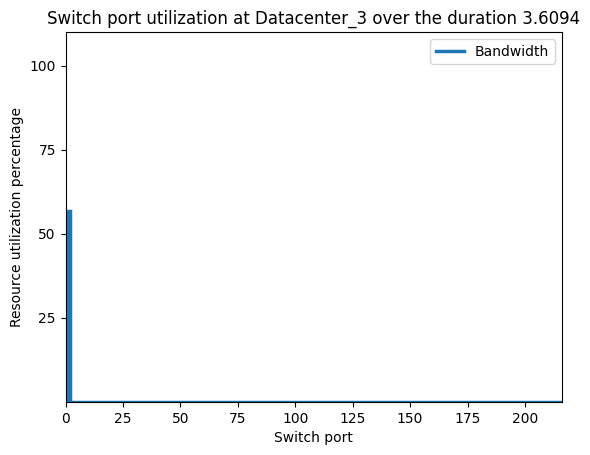

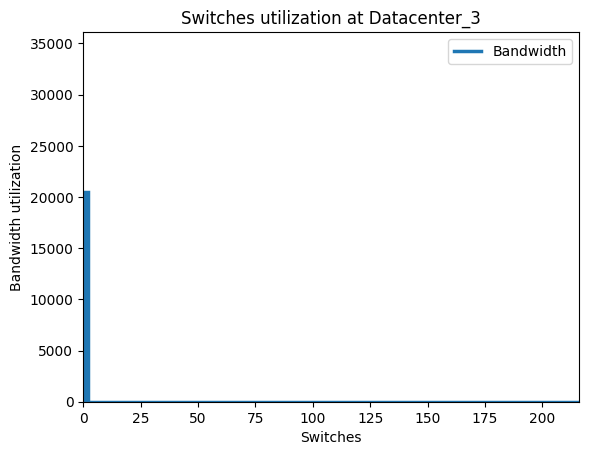

>> 1056
>> 1056
<< 2144 >>


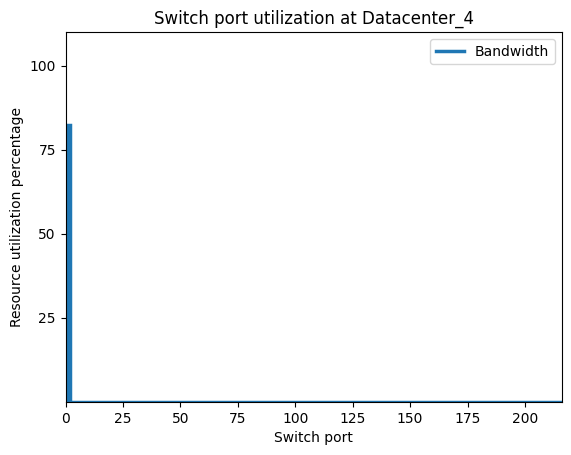

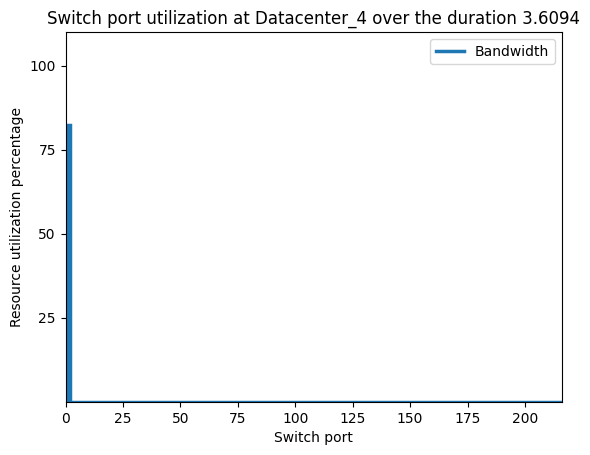

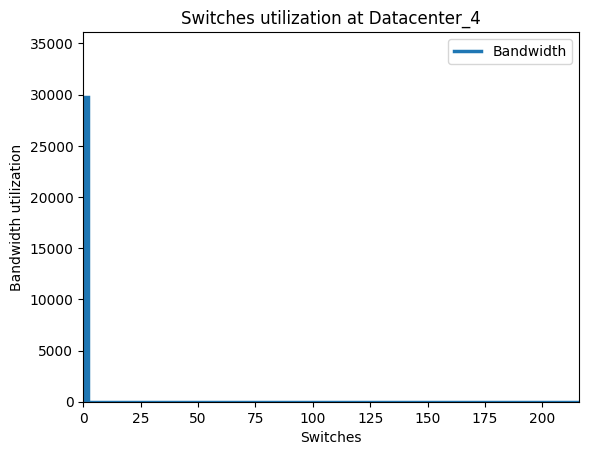

In [26]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "core switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

datacenter_core_switch_ports = np.array([])
datacenter_core_switch_ports_powered_on = np.array([])
datacenter_core_switch_ports_powered_off = np.array([])

datacenter_core_switch_ports_max_power = np.array([])
datacenter_core_switch_ports_current_power = np.array([])

datacenter_core_switches_max_combined_power = np.array([])
datacenter_core_switches_current_combined_power = np.array([])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    
    switch_ports = 0
    switch_ports_on = 0
    switch_ports_off = 0
    
    max_port_power = 0
    current_port_power = 0
    
    max_combined_power = 0
    current_combined_power = 0
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        max_combined_power += sample['high_power']
        if sample['is_active'] == True:
            print(">>", sample['high_power'])
            current_combined_power += sample['high_power']
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            # print(">",len(ports))
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
                    
                    switch_ports += 1
                    max_port_power += sample['power_per_port']
                    max_combined_power += sample['power_per_port']
                    if port_info[1].lower() == "true":
                        switch_ports_on += 1
                        current_combined_power += sample['power_per_port']
                    #     print(">> -- >>", sample['power_per_port'])
                    else:
                        switch_ports_off += 1
                # else:
                #     print("---")
                #     switch_ports_off += 1
    print("<<", current_combined_power, ">>")
    datacenter_core_switch_ports = np.append(datacenter_core_switch_ports, switch_ports)
    datacenter_core_switch_ports_powered_on = np.append(datacenter_core_switch_ports_powered_on, switch_ports_on)
    datacenter_core_switch_ports_powered_off = np.append(datacenter_core_switch_ports_powered_off, switch_ports_off)
    datacenter_core_switch_ports_max_power = np.append(datacenter_core_switch_ports_max_power, max_port_power)
    datacenter_core_switch_ports_current_power = np.append(datacenter_core_switch_ports_current_power, current_port_power)
    
    datacenter_core_switches_max_combined_power = np.append(datacenter_core_switches_max_combined_power, max_combined_power)
    datacenter_core_switches_current_combined_power = np.append(datacenter_core_switches_current_combined_power, current_combined_power)
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_port_bandwidth_utilization * dataset['duration'][0]) / (max_switch_port_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

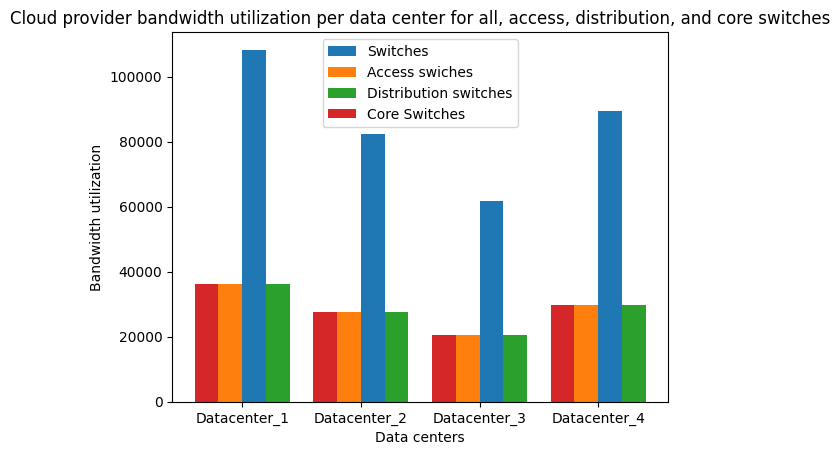

In [27]:
datacenter_bandwidth_utilization = np.array([])
datacenter_access_bandwidth_utilization = np.array([])
datacenter_distribution_bandwidth_utilization = np.array([])
datacenter_core_bandwidth_utilization = np.array([])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_bandwidth_utilization = np.append(datacenter_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_access_bandwidth_utilization = np.append(datacenter_access_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_distribution_bandwidth_utilization = np.append(datacenter_distribution_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_core_bandwidth_utilization = np.append(datacenter_core_bandwidth_utilization, np.sum(switch_bandwidth_utilization))

bar_width = 0.2
x = np.arange(len(labels))
plt.bar(x + bar_width/2, datacenter_bandwidth_utilization, bar_width, label="Switches")
plt.bar(x - bar_width/2, datacenter_access_bandwidth_utilization, bar_width, label="Access swiches")
plt.bar(x + bar_width+bar_width/2, datacenter_distribution_bandwidth_utilization, bar_width, label="Distribution switches")
plt.bar(x - bar_width-bar_width/2, datacenter_core_bandwidth_utilization, bar_width, label="Core Switches")
plt.xlabel("Data centers")
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel("Bandwidth utilization")
plt.title("Cloud provider bandwidth utilization per data center for all, access, distribution, and core switches")
plt.legend()
plt.show()

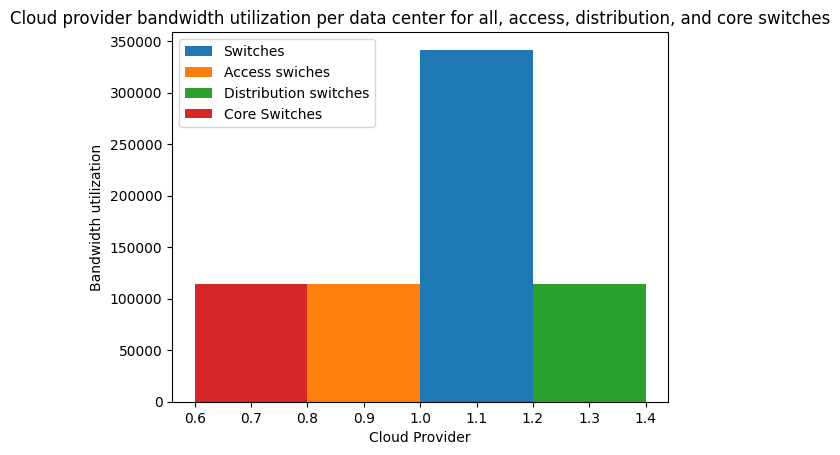

In [28]:
plt.bar(1 + bar_width/2, np.sum(datacenter_bandwidth_utilization), bar_width, label="Switches")
plt.bar(1 - bar_width/2, np.sum(datacenter_access_bandwidth_utilization), bar_width, label="Access swiches")
plt.bar(1 + bar_width+bar_width/2, np.sum(datacenter_distribution_bandwidth_utilization), bar_width, label="Distribution switches")
plt.bar(1 - bar_width-bar_width/2, np.sum(datacenter_core_bandwidth_utilization), bar_width, label="Core Switches")
plt.xlabel("Cloud Provider")
plt.ylabel("Bandwidth utilization")
plt.title("Cloud provider bandwidth utilization per data center for all, access, distribution, and core switches")
plt.legend()
plt.show()

Resource utilization

In [29]:
print(f"Out of the {np.sum(datacenter_access_switches) + np.sum(datacenter_distribution_switches) + np.sum(datacenter_core_switches)} total switches {np.sum(datacenter_access_switches_powered_on) + np.sum(datacenter_distribution_switches_powered_on) + np.sum(datacenter_core_switches_powered_on)} are powered on while {np.sum(datacenter_access_switches_powered_off) + np.sum(datacenter_distribution_switches_powered_off) + np.sum(datacenter_core_switches_powered_off)} are powered off. (percent: {((np.sum(datacenter_access_switches_powered_on) + np.sum(datacenter_distribution_switches_powered_on) + np.sum(datacenter_core_switches_powered_on))/(np.sum(datacenter_access_switches) + np.sum(datacenter_distribution_switches) + np.sum(datacenter_core_switches)))*100}%)")
print(f"Out of the {np.sum(datacenter_access_switches)} total access switches {np.sum(datacenter_access_switches_powered_on)} are powered on while {np.sum(datacenter_access_switches_powered_off)} are powered off. (percent: {((np.sum(datacenter_access_switches_powered_on))/np.sum(datacenter_access_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_distribution_switches)} total distribution switches {np.sum(datacenter_distribution_switches_powered_on)} are powered on while {np.sum(datacenter_distribution_switches_powered_off)} are powered off. (percent: {((np.sum(datacenter_distribution_switches_powered_on))/np.sum(datacenter_distribution_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_core_switches)} total core switches {np.sum(datacenter_core_switches_powered_on)} are powered on while {np.sum(datacenter_core_switches_powered_off)} are powered off. (percent: {((np.sum(datacenter_core_switches_powered_on))/np.sum(datacenter_core_switches))*100}%)")
print()
print(f"Out of the {np.sum(datacenter_access_switch_ports) + np.sum(datacenter_distribution_switch_ports) + np.sum(datacenter_core_switch_ports)} total switch_ports {np.sum(datacenter_access_switch_ports_powered_on) + np.sum(datacenter_distribution_switch_ports_powered_on) + np.sum(datacenter_core_switch_ports_powered_on)} powered on while {np.sum(datacenter_access_switch_ports_powered_off) + np.sum(datacenter_distribution_switch_ports_powered_off) + np.sum(datacenter_core_switch_ports_powered_off)} are powered off. (percent: {((np.sum(datacenter_access_switch_ports_powered_on) + np.sum(datacenter_distribution_switch_ports_powered_on) + np.sum(datacenter_core_switch_ports_powered_on))/(np.sum(datacenter_access_switch_ports) + np.sum(datacenter_distribution_switch_ports) + np.sum(datacenter_core_switch_ports)))*100}%)")
print(f"Out of the {np.sum(datacenter_access_switch_ports)} total access switch ports {np.sum(datacenter_access_switch_ports_powered_on)} are powered on while {np.sum(datacenter_access_switch_ports_powered_off)} are powered off. (percent: {((np.sum(datacenter_access_switch_ports_powered_on))/np.sum(datacenter_access_switch_ports))*100}%)")
print(f"Out of the {np.sum(datacenter_distribution_switch_ports)} total distribution switch ports {np.sum(datacenter_distribution_switch_ports_powered_on)} are powered on while {np.sum(datacenter_distribution_switch_ports_powered_off)} are powered off. (percent: {((np.sum(datacenter_distribution_switch_ports_powered_on))/np.sum(datacenter_distribution_switch_ports))*100}%)")
print(f"Out of the {np.sum(datacenter_core_switch_ports)} total core switch ports {np.sum(datacenter_core_switch_ports_powered_on)} are powered on while {np.sum(datacenter_core_switch_ports_powered_off)} are powered off. (percent: {((np.sum(datacenter_core_switch_ports_powered_on))/np.sum(datacenter_core_switch_ports))*100}%)")
print()
print(f"Out of the {np.sum(datacenter_access_switches_max_bw) + np.sum(datacenter_distribution_switches_max_bw) + np.sum(datacenter_core_switches_max_bw)} available bandwidth {np.sum(datacenter_access_switches_used_bw) + np.sum(datacenter_distribution_switches_used_bw) + np.sum(datacenter_core_switches_used_bw)} is used. (percent: {((np.sum(datacenter_access_switches_used_bw) + np.sum(datacenter_distribution_switches_used_bw) + np.sum(datacenter_core_switches_used_bw))/(np.sum(datacenter_access_switches_max_bw) + np.sum(datacenter_distribution_switches_max_bw) + np.sum(datacenter_core_switches_max_bw)))*100}%)")
print(f"Out of the {np.sum(datacenter_access_switches_max_bw)} available bandwidth for access switches {np.sum(datacenter_access_switches_used_bw)} is used. (percent: {((np.sum(datacenter_access_switches_used_bw))/np.sum(datacenter_access_switches_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_distribution_switches_max_bw)} available bandwidth for distribution switches {np.sum(datacenter_distribution_switches_used_bw)} is used. (percent: {((np.sum(datacenter_distribution_switches_used_bw))/np.sum(datacenter_distribution_switches_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_core_switches_max_bw)} available bandwidth for core switches {np.sum(datacenter_core_switches_used_bw)} is used. (percent: {((np.sum(datacenter_core_switches_used_bw))/np.sum(datacenter_core_switches_max_bw))*100}%)")

# print(f"Out of the {np.sum(datacenter_total_storage_capacity)} GB of disk space {np.sum(datacenter_used_storage_capacity)} GB is used. (percent: {((np.sum(datacenter_used_storage_capacity))/np.sum(datacenter_total_storage_capacity))*100}%)")
# print(f"With a total active duration of all disks {np.sum(datacenter_active_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_active_duration))/np.sum(datacenter_total_duration))*100}%)")
# print(f"With a total inactive duration of all disks {np.sum(datacenter_inactive_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_inactive_duration))/np.sum(datacenter_total_duration))*100}%)")


Out of the 49.0 total switches 49.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 33.0 total access switches 33.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 8.0 total distribution switches 8.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 8.0 total core switches 8.0 are powered on while 0.0 are powered off. (percent: 100.0%)

Out of the 2916.0 total switch_ports 1214.0 powered on while 1702.0 are powered off. (percent: 41.63237311385459%)
Out of the 1188.0 total access switch ports 1116.0 are powered on while 72.0 are powered off. (percent: 93.93939393939394%)
Out of the 864.0 total distribution switch ports 82.0 are powered on while 782.0 are powered off. (percent: 9.49074074074074%)
Out of the 864.0 total core switch ports 16.0 are powered on while 848.0 are powered off. (percent: 1.8518518518518516%)

Out of the 29160000.0 available bandwidth 341586.0 is used. (percent: 1.1714197530864197%)
Out of the 1188

In [30]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"Out of the {datacenter_access_switches[index] + datacenter_distribution_switches[index] + datacenter_core_switches[index]} total switches {datacenter_access_switches_powered_on[index] + datacenter_distribution_switches_powered_on[index] + datacenter_core_switches_powered_on[index]} are powered on while {datacenter_access_switches_powered_off[index] + datacenter_distribution_switches_powered_off[index] + datacenter_core_switches_powered_off[index]} are powered off. (percent: {((datacenter_access_switches_powered_on[index] + datacenter_distribution_switches_powered_on[index] + datacenter_core_switches_powered_on[index])/(datacenter_access_switches[index] + datacenter_distribution_switches[index] + datacenter_core_switches[index]))*100}%)")
    print(f"Out of the {datacenter_access_switches[index]} total access switches {datacenter_access_switches_powered_on[index]} are powered on while {datacenter_access_switches_powered_off[index]} are powered off. (percent: {((datacenter_access_switches_powered_on[index])/datacenter_access_switches[index])*100}%)")
    print(f"Out of the {datacenter_distribution_switches[index]} total distribution switches {datacenter_distribution_switches_powered_on[index]} are powered on while {datacenter_distribution_switches_powered_off[index]} are powered off. (percent: {((datacenter_distribution_switches_powered_on[index])/datacenter_distribution_switches[index])*100}%)")
    print(f"Out of the {datacenter_core_switches[index]} total core switches {datacenter_core_switches_powered_on[index]} are powered on while {datacenter_core_switches_powered_off[index]} are powered off. (percent: {((datacenter_core_switches_powered_on[index])/datacenter_core_switches[index])*100}%)")
    print()
    print(f"Out of the {datacenter_access_switch_ports[index] + datacenter_distribution_switch_ports[index] + datacenter_core_switch_ports[index]} total switch ports {datacenter_access_switch_ports_powered_on[index] + datacenter_distribution_switch_ports_powered_on[index] + datacenter_core_switch_ports_powered_on[index]} are powered on while {datacenter_access_switch_ports_powered_off[index] + datacenter_distribution_switch_ports_powered_off[index] + datacenter_core_switch_ports_powered_off[index]} are powered off. (percent: {((datacenter_access_switch_ports_powered_on[index] + datacenter_distribution_switch_ports_powered_on[index] + datacenter_core_switch_ports_powered_on[index])/(datacenter_access_switch_ports[index] + datacenter_distribution_switch_ports[index] + datacenter_core_switch_ports[index]))*100}%)")
    print(f"Out of the {datacenter_access_switch_ports[index]} total access switch ports {datacenter_access_switch_ports_powered_on[index]} are powered on while {datacenter_access_switch_ports_powered_off[index]} are powered off. (percent: {((datacenter_access_switch_ports_powered_on[index])/datacenter_access_switch_ports[index])*100}%)")
    print(f"Out of the {datacenter_distribution_switch_ports[index]} total distribution switch ports {datacenter_distribution_switch_ports_powered_on[index]} are powered on while {datacenter_distribution_switch_ports_powered_off[index]} are powered off. (percent: {((datacenter_distribution_switch_ports_powered_on[index])/datacenter_distribution_switch_ports[index])*100}%)")
    print(f"Out of the {datacenter_core_switch_ports[index]} total core switch ports {datacenter_core_switch_ports_powered_on[index]} are powered on while {datacenter_core_switch_ports_powered_off[index]} are powered off. (percent: {((datacenter_core_switch_ports_powered_on[index])/datacenter_core_switch_ports[index])*100}%)")
    print()
    print(f"Out of the {datacenter_access_switches_max_bw[index] + datacenter_distribution_switches_max_bw[index] + datacenter_core_switches_max_bw[index]} available bandwidth {datacenter_access_switches_used_bw[index] + datacenter_distribution_switches_used_bw[index] + datacenter_core_switches_used_bw[index]} is used. (percent: {((datacenter_access_switches_used_bw[index] + datacenter_distribution_switches_used_bw[index] + datacenter_core_switches_used_bw[index])/(datacenter_access_switches_max_bw[index] + datacenter_distribution_switches_max_bw[index] + datacenter_core_switches_max_bw[index]))*100}%)")
    print(f"Out of the {datacenter_access_switches_max_bw[index]} available bandwidth for access switches {datacenter_access_switches_used_bw[index]} is used. (percent: {((datacenter_access_switches_used_bw[index])/datacenter_access_switches_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_distribution_switches_max_bw[index]} available bandwidth for distribution switches {datacenter_distribution_switches_used_bw[index]} is used. (percent: {((datacenter_distribution_switches_used_bw[index])/datacenter_distribution_switches_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_core_switches_max_bw[index]} available bandwidth for core switches {datacenter_core_switches_used_bw[index]} is used. (percent: {((datacenter_core_switches_used_bw[index])/datacenter_core_switches_max_bw[index])*100}%)")
    print()


---------- Datacenter_1 ----------
Out of the 16.0 total switches 16.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 12.0 total access switches 12.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 2.0 total distribution switches 2.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 2.0 total core switches 2.0 are powered on while 0.0 are powered off. (percent: 100.0%)

Out of the 864.0 total switch ports 456.0 are powered on while 408.0 are powered off. (percent: 52.77777777777778%)
Out of the 432.0 total access switch ports 424.0 are powered on while 8.0 are powered off. (percent: 98.14814814814815%)
Out of the 216.0 total distribution switch ports 28.0 are powered on while 188.0 are powered off. (percent: 12.962962962962962%)
Out of the 216.0 total core switch ports 4.0 are powered on while 212.0 are powered off. (percent: 1.8518518518518516%)

Out of the 8640000.0 available bandwidth 108282.0 is used. (percent: 1.2

Power

In [31]:
print("All switches:")
print(f"The maximum power consumption for the cloud provider is {(np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power))}W")
print(f"The current power consumption for the cloud provider is {(np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power))}W")
print(f"The cloud provider is saving {(np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) - (np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power))}W")
print(f"The cloud provider is thus using {((np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power)) / (np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power))) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {(((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) - (np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power))) / (np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power))) * 100}% of their full power consumption.")

print(f"The maximum energy consumption for the cloud provider is {((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {((np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power)) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {(((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) * 1) / 1000) - (((np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power)) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {((((np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power)) * 1) / 1000) / (((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {(((((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) - (np.sum(datacenter_access_switches_current_combined_power) + np.sum(datacenter_distribution_switches_current_combined_power) + np.sum(datacenter_core_switches_current_combined_power))) * 1) / 1000) / (((np.sum(datacenter_access_switches_max_combined_power) + np.sum(datacenter_distribution_switches_max_combined_power) + np.sum(datacenter_core_switches_max_combined_power)) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("Access switches:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_access_switches_max_combined_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_access_switches_current_combined_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_access_switches_max_combined_power) - np.sum(datacenter_access_switches_current_combined_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_access_switches_current_combined_power) / np.sum(datacenter_access_switches_max_combined_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_access_switches_max_combined_power) - np.sum(datacenter_access_switches_current_combined_power)) / np.sum(datacenter_access_switches_max_combined_power)) * 100}% of their full power consumption.")

print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_access_switches_max_combined_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_access_switches_current_combined_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_access_switches_max_combined_power) * 1) / 1000) - ((np.sum(datacenter_access_switches_current_combined_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_access_switches_current_combined_power) * 1) / 1000) / ((np.sum(datacenter_access_switches_max_combined_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_access_switches_max_combined_power) - np.sum(datacenter_access_switches_current_combined_power)) * 1) / 1000) / ((np.sum(datacenter_access_switches_max_combined_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("Distribution switches:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_distribution_switches_max_combined_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_distribution_switches_current_combined_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_distribution_switches_max_combined_power) - np.sum(datacenter_distribution_switches_current_combined_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_distribution_switches_current_combined_power) / np.sum(datacenter_distribution_switches_max_combined_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_distribution_switches_max_combined_power) - np.sum(datacenter_distribution_switches_current_combined_power)) / np.sum(datacenter_distribution_switches_max_combined_power)) * 100}% of their full power consumption.")

print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_distribution_switches_max_combined_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_distribution_switches_current_combined_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_distribution_switches_max_combined_power) * 1) / 1000) - ((np.sum(datacenter_distribution_switches_current_combined_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_distribution_switches_current_combined_power) * 1) / 1000) / ((np.sum(datacenter_distribution_switches_max_combined_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_distribution_switches_max_combined_power) - np.sum(datacenter_distribution_switches_current_combined_power)) * 1) / 1000) / ((np.sum(datacenter_distribution_switches_max_combined_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("Core switches:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_core_switches_max_combined_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_core_switches_current_combined_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_core_switches_max_combined_power) - np.sum(datacenter_core_switches_current_combined_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_core_switches_current_combined_power) / np.sum(datacenter_core_switches_max_combined_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_core_switches_max_combined_power) - np.sum(datacenter_core_switches_current_combined_power)) / np.sum(datacenter_core_switches_max_combined_power)) * 100}% of their full power consumption.")

print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_core_switches_max_combined_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_core_switches_current_combined_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_core_switches_max_combined_power) * 1) / 1000) - ((np.sum(datacenter_core_switches_current_combined_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_core_switches_current_combined_power) * 1) / 1000) / ((np.sum(datacenter_core_switches_max_combined_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_core_switches_max_combined_power) - np.sum(datacenter_core_switches_current_combined_power)) * 1) / 1000) / ((np.sum(datacenter_core_switches_max_combined_power) * 1) / 1000)) * 100}% energy (kJ/s).")

All switches:
The maximum power consumption for the cloud provider is 44580.0W
The current power consumption for the cloud provider is 30964.0W
The cloud provider is saving 13616.0W
The cloud provider is thus using 69.45715567519068% of their full power consumption.
The cloud provider is thus using 30.54284432480933% of their full power consumption.
The maximum energy consumption for the cloud provider is 44.58kJ/s
The current energy consumption for the cloud provider is 30.964kJ/s
The cloud provider is saving 13.616kJ/s
The cloud provider is thus using 69.45715567519066% of their full energy consumption (kJ/s).
The cloud provider is saving 30.54284432480933% energy (kJ/s).

Access switches:
The maximum power consumption for the cloud provider is 13860.0W
The current power consumption for the cloud provider is 13284.0W
The cloud provider is saving 576.0W
The cloud provider is thus using 95.84415584415584% of their full power consumption.
The cloud provider is thus using 4.1558441558441

In [32]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("All switches:")
    print(f"The maximum power consumption for the cloud provider is {(datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index])}W")
    print(f"The current power consumption for the cloud provider is {(datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index])}W")
    print(f"The cloud provider is saving {(datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) - (datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index])}W")
    print(f"The cloud provider is thus using {((datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index]) / (datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index])) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {(((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) - (datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index])) / (datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index])) * 100}% of their full power consumption.")

    print(f"The maximum energy consumption for the cloud provider is {((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {((datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index]) * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {(((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) * 1) / 1000) - (((datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index]) * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {((((datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index]) * 1) / 1000) / (((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {(((((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) - (datacenter_access_switches_current_combined_power[index] + datacenter_distribution_switches_current_combined_power[index] + datacenter_core_switches_current_combined_power[index])) * 1) / 1000) / (((datacenter_access_switches_max_combined_power[index] + datacenter_distribution_switches_max_combined_power[index] + datacenter_core_switches_max_combined_power[index]) * 1) / 1000)) * 100}% energy (kJ/s).")
    print()


    print("Access switches:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_access_switches_max_combined_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_access_switches_current_combined_power[index]}W")
    print(f"The cloud provider is saving {datacenter_access_switches_max_combined_power[index] - datacenter_access_switches_current_combined_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_access_switches_current_combined_power[index] / datacenter_access_switches_max_combined_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_access_switches_max_combined_power[index] - datacenter_access_switches_current_combined_power[index]) / datacenter_access_switches_max_combined_power[index]) * 100}% of their full power consumption.")

    print(f"The maximum energy consumption for the cloud provider is {(datacenter_access_switches_max_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_access_switches_current_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_access_switches_max_combined_power[index] * 1) / 1000) - ((datacenter_access_switches_current_combined_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_access_switches_current_combined_power[index] * 1) / 1000) / ((datacenter_access_switches_max_combined_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_access_switches_max_combined_power[index] - datacenter_access_switches_current_combined_power[index]) * 1) / 1000) / ((datacenter_access_switches_max_combined_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

    print("Distribution switches:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_distribution_switches_max_combined_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_distribution_switches_current_combined_power[index]}W")
    print(f"The cloud provider is saving {datacenter_distribution_switches_max_combined_power[index] - datacenter_distribution_switches_current_combined_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_distribution_switches_current_combined_power[index] / datacenter_distribution_switches_max_combined_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_distribution_switches_max_combined_power[index] - datacenter_distribution_switches_current_combined_power[index]) / datacenter_distribution_switches_max_combined_power[index]) * 100}% of their full power consumption.")

    print(f"The maximum energy consumption for the cloud provider is {(datacenter_distribution_switches_max_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_distribution_switches_current_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_distribution_switches_max_combined_power[index] * 1) / 1000) - ((datacenter_distribution_switches_current_combined_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_distribution_switches_current_combined_power[index] * 1) / 1000) / ((datacenter_distribution_switches_max_combined_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_distribution_switches_max_combined_power[index] - datacenter_distribution_switches_current_combined_power[index]) * 1) / 1000) / ((datacenter_distribution_switches_max_combined_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

    print("Core switches:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_core_switches_max_combined_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_core_switches_current_combined_power[index]}W")
    print(f"The cloud provider is saving {datacenter_core_switches_max_combined_power[index] - datacenter_core_switches_current_combined_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_core_switches_current_combined_power[index] / datacenter_core_switches_max_combined_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_core_switches_max_combined_power[index] - datacenter_core_switches_current_combined_power[index]) / datacenter_core_switches_max_combined_power[index]) * 100}% of their full power consumption.")

    print(f"The maximum energy consumption for the cloud provider is {(datacenter_core_switches_max_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_core_switches_current_combined_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_core_switches_max_combined_power[index] * 1) / 1000) - ((datacenter_core_switches_current_combined_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_core_switches_current_combined_power[index] * 1) / 1000) / ((datacenter_core_switches_max_combined_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_core_switches_max_combined_power[index] - datacenter_core_switches_current_combined_power[index]) * 1) / 1000) / ((datacenter_core_switches_max_combined_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
All switches:
The maximum power consumption for the cloud provider is 12720.0W
The current power consumption for the cloud provider is 9456.0W
The cloud provider is saving 3264.0W
The cloud provider is thus using 74.33962264150942% of their full power consumption.
The cloud provider is thus using 25.660377358490567% of their full power consumption.
The maximum energy consumption for the cloud provider is 12.72kJ/s
The current energy consumption for the cloud provider is 9.456kJ/s
The cloud provider is saving 3.264000000000001kJ/s
The cloud provider is thus using 74.33962264150942% of their full energy consumption (kJ/s).
The cloud provider is saving 25.66037735849056% energy (kJ/s).

Access switches:
The maximum power consumption for the cloud provider is 5040.0W
The current power consumption for the cloud provider is 4976.0W
The cloud provider is saving 64.0W
The cloud provider is thus using 98.73015873015873% of their full power consumption.
The clo

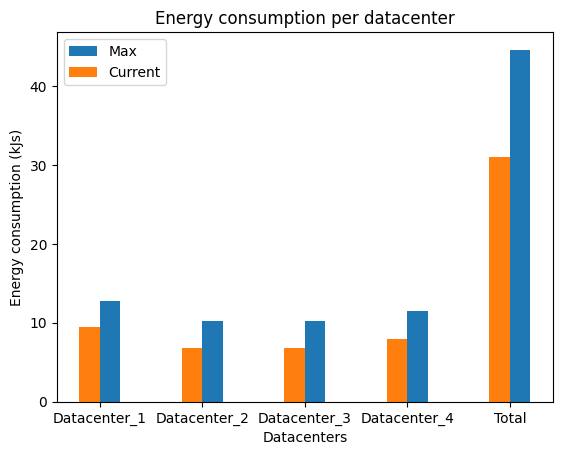

In [33]:
bar_width = 0.2
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width / 2, (np.append((datacenter_access_switches_max_combined_power + datacenter_distribution_switches_max_combined_power + datacenter_core_switches_max_combined_power), np.sum(datacenter_access_switches_max_combined_power + datacenter_distribution_switches_max_combined_power + datacenter_core_switches_max_combined_power)) * 1) / 1000, bar_width, label="Max")
plt.bar(x - bar_width / 2, (np.append((datacenter_access_switches_current_combined_power + datacenter_distribution_switches_current_combined_power + datacenter_core_switches_current_combined_power), np.sum(datacenter_access_switches_current_combined_power + datacenter_distribution_switches_current_combined_power + datacenter_core_switches_current_combined_power)) * 1) / 1000, bar_width, label="Current")
plt.xticks(x, np.append(labels, "Total"))
plt.xlabel("Datacenters")
plt.ylabel("Energy consumption (kJs)")
plt.title("Energy consumption per datacenter")
plt.legend()
plt.show()
